# Project Title
 **Weather Forecasting with Deep Learning**

## Authors and Team

- **Author 1**: Anagha, Responsible for data collection, preprocessing,implementation of deep learning models,  LSTM architectures,fine tuning,deploying
- **Author 2**: Naveen,  Responsible for data collection, preprocessing,implementation of deep learning models, 1D CNN architectures ,fine tuning,deploying


# **Abstract**

Weather forecasting is a crucial task that significantly impacts various sectors, including agriculture, disaster management, and daily life. This project explores the application of deep learning techniques, specifically Long Short-Term Memory (LSTM) and 1D Convolutional Neural Networks (1D CNN), for accurate weather prediction using the NOAA Daily Summaries dataset. The dataset comprises historical weather data, including temperature, precipitation, humidity, and wind speed, providing a rich source of information for training and evaluating the models.

LSTM models are adept at capturing temporal dependencies in time series data, making them well-suited for sequential weather forecasting tasks. In contrast, 1D CNN models excel at extracting local patterns and features from the data, providing a complementary approach to capturing spatial-temporal patterns. This project implements both models to forecast key weather parameters and compares their performance in terms of accuracy, training time, and generalization ability.

The experimental results demonstrate the potential of deep learning models in enhancing weather prediction accuracy compared to traditional statistical methods. The LSTM model effectively captures long-term dependencies, while the 1D CNN model identifies critical features contributing to forecast improvements. By leveraging these models, the project aims to provide a robust framework for weather forecasting that can be further extended to real-time applications, contributing to more reliable and actionable weather predictions.

The study concludes that integrating deep learning models can significantly advance weather forecasting accuracy, offering valuable insights for future research and development in meteorological prediction systems.


## Executive Summary

### Decisions to be impacted :
In the context of weather forecasting, machine learning plays a very important role in helping us predict future weather conditions and also the accuracy of our predictions. These predictions play a crucial role in many real-world applications. Some of them include:

Agriculture:
* Crop planting: Decisions on when to plant a crop is highly dependent on the weather. If the region is expecting famine during crop planting, then the farmer might undergo huge losses.
* Irrigation: Farmers can decide on how much water would be needed based on future weather data.
* Pest Control: Many pests thrive on warmer climates where there is high CO2 levels in the soil. Controlling when to use pesticides and how much pesticides should be used is critical to crop survival.

Transportation:
* Flight and Shipping schedules: it is important for flight and shipping companies to know the weather conditions so that they can reroute in case of bad weather conditions.
* Public transport Operations: In case of severe weather, the public might need more access to public transport and knowing weather conditions beforehand can help them be prepared.

Emergency and Disaster Management:
* Resource allocation: The government can provide the necessary resources to the public when they have managed procuring large quantities of food, water etc.,
* Evacuations: The government and the public can know about the evacuation plans and can better prepare their home and shelter to bear the brunt of the disaster.

### Motivation:
This project is personally significant to us as there were many days where the forecast was not accurate, due to which our everyday activities were ruined. There have been so many days where inaccurate where predictions have caused inconviniences- like planning outdoor activities or even going out poorly dressed for the weather. These instances have made us realise that weather forecast is extremely important, not just to business, but also for every-day human activities.
Apart from this, poor weather predictions can greatly affect crop yields and wreck havoc in case of disasters. Which is why a good weather forecasting model is of utmost importance to the society.

### Business values:
The aim of this project is to help the society to be better prepared in terms of future weather. As seen in the past, hurricanes and snowfall can cause a lot of property damage and have a wrongful impact on the everyday activities of a human being. This project aims to minimize these situations and improve the current weather forecasting applications.

## Data Description/Preprocessing

### Data Description:
While we did consider utilising the NOAA data as our original dataset, the hurricane Helene caused major outages due to which we had to change our data to Open Meteo historical data API. Our dataset now containes 32 features and 1086120 samples. We have obtained these features from 5 cities: Los Angeles, Houston, St Louis, Chicago and New York City. The reason for choosing this dataset is due to the wide variety of weather patterns each of these cities observe.

### Data Preprocessing:
The dataset for our project did not have many missing values. The only missing values that were present were in rain. Since we have considered hourly data for this project and the fact that most of the cities do not experience rainfall all the year round, we couldn't observe any values. So we decided to convert the missing values to zeroes. Also, we encoded the catergorical variables for the weather codes, making it easily comprehendable. 


# Machine Learning Morphisms: Mathematical Formulation

## 1. Morphism Space Definition
Let $\mathcal{M} = \{S, X, Y\}$ be the morphism space, where:

- $S$: Sample Space
- $X$: Feature Space
- $Y$: Target Space

### 1.1 Morphism Transformation Operator
Define the morphism transformation operator $\mathcal{M}: S \to Y$ as:

$$\mathcal{M}(s) = \bigcup_{i=1}^{k} F_i(s)$$

Where $F_i$ represents different transformation functions.

---

## 2. Data Preprocessing Morphism $\mathcal{M}_1$

### 2.1 Preprocessing Transformation
$$\mathcal{M}_1: S \to X$$

$$X = \{\xi \mid \xi = f_{prep}(s), s \in S\}$$

Preprocessing functions:

- Null value handling: $f_{null}(s)$
- Outlier detection: $f_{outlier}(s)$
  - IQR-based outlier removal
  - Mahalanobis distance-based outlier detection
  - Minimum Covariance Determinant (MCD) outlier detection
  - Time series decomposition-based outlier removal
- Standardization: $f_{std}(s)$

The preprocessing pipeline:

$$f_{prep}(s) = f_{std}(f_{outlier}(f_{null}(s)))$$

Empirical Risk Functions:

##### Null Value Handling
$$
R_{null} = \frac{1}{n} \sum_{i=1}^n L(f_{null}(s_i), y_i)
$$

##### Outlier Detection
For IQR-based removal:
$$
R_{outlier} = \frac{1}{n} \sum_{i=1}^n L(f_{outlier}(s_i), y_i)
$$

##### Standardization
$$
R_{std} = \frac{1}{n} \sum_{i=1}^n \left( \frac{s_i - \mu}{\sigma} \right)^2
$$

##### Combined Preprocessing Pipeline
$$
R_{prep} = R_{null} + R_{outlier} + R_{std}
$$

## 2. Feature Engineering

### Log Transformation
$$
R_{log} = \frac{1}{n} \sum_{i=1}^n L(f_{log}(x_i), y_i)
$$

Parameters:


---

### 2.2 Outlier Detection Methods

#### 2.2.1 IQR-based Outlier Removal
Outliers are identified using the Interquartile Range (IQR):

1. Compute the first ($Q_1$) and third quartiles ($Q_3$) of the data.
2. Calculate the IQR:
   $$
   IQR = Q_3 - Q_1
   $$
3. Define lower and upper bounds:
   $$
   \text{Lower Bound} = Q_1 - 1.5 \cdot IQR
   $$
   $$
   \text{Upper Bound} = Q_3 + 1.5 \cdot IQR
   $$
4. Identify outliers:
   $$
   x \text{ is an outlier if } x < \text{Lower Bound or } x > \text{Upper Bound.}
   $$



#### 2.2.2 Mahalanobis Distance-based Outlier Detection
Mahalanobis distance is used to measure the distance of a point from the center of a multivariate distribution:

1. Compute the mean vector $\mu$ and covariance matrix $\Sigma$ of the dataset.
2. Calculate the Mahalanobis distance for each data point $x$:
   $$
   D_M(x) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
   $$
3. Define a threshold (e.g., based on the Chi-squared distribution) to classify outliers:
   $$
   D_M(x) > \text{Threshold} \implies x \text{ is an outlier.}
   $$



#### 2.2.3 Minimum Covariance Determinant (MCD) Outlier Detection
The MCD method is a robust estimator of covariance and location:

1. Compute the MCD location $\mu_{MCD}$ and covariance $\Sigma_{MCD}$ from the data.
2. Calculate the Mahalanobis distance using MCD estimators:
   $$
   D_{MCD}(x) = \sqrt{(x - \mu_{MCD})^T \Sigma_{MCD}^{-1} (x - \mu_{MCD})}
   $$
3. Identify outliers:
   $$
   D_{MCD}(x) > \text{Threshold} \implies x \text{ is an outlier.}
   $$



#### 2.2.4 Time Series Decomposition-based Outlier Removal
Outliers in time series data are identified by decomposing the data into trend, seasonality, and residuals:

1. Decompose the time series:
   $$
   x_t = T_t + S_t + R_t
   $$
   Where:
   - $T_t$: Trend component
   - $S_t$: Seasonal component
   - $R_t$: Residual (random) component
2. Identify outliers in the residual component:
   $$
   R_t \text{ is an outlier if } |R_t| > k \cdot \sigma(R)
   $$
   Where $\sigma(R)$ is the standard deviation of the residuals and $k$ is a chosen threshold (e.g., $k=3$ for 3 standard deviations).



### 2.3 Standardization Function
$$f_{std}(x) = \frac{x - \mu(X)}{\sigma(X)}$$

Where:
- $\mu(X)$ is the mean of the feature $X$.
- $\sigma(X)$ is the standard deviation of the feature $X$.




---

## 3. Feature Engineering Morphism $\mathcal{M}_2$

### 3.1 Feature Transformation
$$\mathcal{M}_2: X \to X'$$

$$X' = \{\xi' \mid \xi' = f_{eng}(\xi), \xi \in X\}$$

Feature engineering operations:

- **Log transformation**: $f_{log}(x)$
- **Correlation analysis**: $f_{corr}(X)$
- **Feature selection**: $f_{select}(X)$
- **One-hot encoding for categorical variables**: $f_{onehot}(X)$

The feature engineering pipeline:

$$f_{eng}(x) = f_{select}(f_{corr}(f_{log}(f_{onehot}(x))))$$



### 3.2 Correlation Matrix Computation
The correlation matrix $\rho$ measures the pairwise relationships between features:

$$\rho_{i,j} = \frac{Cov(X_i, X_j)}{\sigma(X_i)\sigma(X_j)}$$

Where:
- $Cov(X_i, X_j)$ is the covariance between features $X_i$ and $X_j$.
- $\sigma(X_i)$ and $\sigma(X_j)$ are the standard deviations of $X_i$ and $X_j$, respectively.



### 3.3 Feature Selection Based on High Correlation
Highly correlated independent features introduce redundancy. Features with a correlation coefficient $\rho > \tau$ (threshold) are removed:

1. Compute the correlation matrix $\rho$ for all independent features.
2. Define a threshold $\tau$ (e.g., $\tau = 0.85$).
3. For each pair $(X_i, X_j)$ where $\rho_{i,j} > \tau$:
   - Remove one of the features $X_i$ or $X_j$, typically based on domain knowledge or variance contribution.

Mathematically:
$$
X' = \{X_i \in X \mid \forall j, \rho_{i,j} \leq \tau \text{ or } i = j\}
$$

Empirical Risk Function:
$$
R_{corr} = \frac{1}{n} \sum_{i=1}^n L\big(f_{corr}(X), y\big)
$$



### 3.4 One-Hot Encoding for Categorical Variables
Categorical variables are transformed into numerical representations using one-hot encoding:

1. For a categorical variable $C$ with $k$ unique categories $\{c_1, c_2, \dots, c_k\}$:
   - Create $k$ binary features $\{C_1, C_2, \dots, C_k\}$, where:
     $$
     C_j = 
     \begin{cases} 
     1 & \text{if } C = c_j \\
     0 & \text{otherwise}
     \end{cases}
     $$
2. Replace $C$ in the dataset with the binary features $\{C_1, C_2, \dots, C_k\}$.

Let $X_{cat}$ represent the set of categorical features in $X$. The transformed dataset after one-hot encoding is:
$$
f_{onehot}(X) = (X \setminus X_{cat}) \cup \bigcup_{C \in X_{cat}} \{C_1, C_2, \dots, C_k\}
$$

Empirical Risk Function:
$$
R_{onehot} = \frac{1}{n} \sum_{i=1}^n L\big(f_{onehot}(X), y\big)
$$



### Final Feature Engineering Pipeline
The complete feature engineering process:
1. Apply one-hot encoding for categorical variables:
   $$
   X \to f_{onehot}(X)
   $$
2. Apply log transformation to numerical features to reduce skewness:
   $$
   X \to f_{log}(X)
   $$
3. Perform correlation analysis and remove features with $\rho > \tau$:
   $$
   X \to f_{corr}(X)
   $$
4. Retain the most relevant features for modeling:
   $$
   X \to f_{select}(X)
   $$

The resulting feature set is:
$$
X' = f_{eng}(X)
$$

---

## 4. Time Series Stationarity Morphism $\mathcal{M}_3$

### 4.1 Stationarity Transformation
$$\mathcal{M}_3: X' \to X''$$

$$X'' = \{\xi'' \mid \xi'' = f_{stat}(\xi'), \xi' \in X'\}$$

Stationarity tests, transformations, and diagnostics:

- **Augmented Dickey-Fuller (ADF) test**: $f_{adf}(x)$
- **Differencing**: $f_{diff}(x)$
- **Seasonal decomposition**: $f_{seasonal}(x)$
- **Autocorrelation Function (ACF) plot**: $f_{acf}(x)$
- **Partial Autocorrelation Function (PACF) plot**: $f_{pacf}(x)$

$$
f_{stat}(x') = 
\begin{cases} 
x' & \text{if } f_{adf}(x') \text{ is stationary} \\
f_{diff}(x') & \text{otherwise}
\end{cases}
$$

Empirical Risk Function:
$$
R_{stat} = \frac{1}{n} \sum_{i=1}^n L\big(f_{stat}(X), y\big)
$$

### 4.2 ACF and PACF Plot Computation
To assess autocorrelation and partial autocorrelation, the following plots are generated:

- **ACF Plot**:
  $$ACF(lag) = \frac{\sum_{t=1}^{T-lag} (x_t - \mu)(x_{t+lag} - \mu)}{\sum_{t=1}^{T} (x_t - \mu)^2}$$

- **PACF Plot**:
  The PACF at lag $k$ is calculated by fitting autoregressive models of order $k$ and examining the correlation between $x_t$ and $x_{t-k}$ after removing the effects of the intermediate lags $1, 2, \dots, k-1$.

These plots are used to:
1. Identify the order of differencing needed (if any).
2. Determine the parameters $p$ (AR order) and $q$ (MA order) for SARIMA modeling.

---



## 5. Model Training Morphism $\mathcal{M}_4$

### 5.1 Model Representation
$$
\mathcal{M}_4: X'' \to \mathcal{M}, \quad M \in \mathcal{M}
$$



Where $M$ is the set of models:

1. **Baseline Model**: $M_{SARIMA}$
2. **1D-CNN**: $M_{1D-CNN}$
3. **LSTM**: $M_{LSTM}$
4. **LSTM with Attention**: $M_{LSTM-Attention}$

---

### 5.1.1 Baseline Model: SARIMAX ($M_{SARIMAX}$)

The **Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX)** model includes both time series components and exogenous features $Z_t$ (e.g., wind speed, humidity, cloud cover). The model is represented as:

$$
\Phi_p(B)(1 - B)^d (1 - B^s)^D y_t = \Theta_q(B) \Theta_Q(B^s) \varepsilon_t + \beta Z_t
$$

- **Components**:
  - $B$: Backshift operator, where $B y_t = y_{t-1}$.
  - $\Phi_p(B)$: Non-seasonal AR polynomial of order $p$:
    $$
    \Phi_p(B) = 1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_p B^p
    $$
  - $\Theta_q(B)$: Non-seasonal MA polynomial of order $q$:
    $$
    \Theta_q(B) = 1 + \theta_1 B + \theta_2 B^2 + \cdots + \theta_q B^q
    $$
  - $d$: Non-seasonal differencing order.
  - $D$: Seasonal differencing order.
  - $s$: Seasonality period (e.g., 12 for monthly data).
  - $Z_t$: Exogenous predictors at time $t$ (e.g., weather variables such as temperature, wind speed, etc.).
  - $\beta$: Coefficient vector for the exogenous predictors.
  - $\varepsilon_t$: White noise at time $t$.

#### **Objective for SARIMAX**:
SARIMAX minimizes the residual sum of squares with respect to both the ARIMA parameters $(p, d, q, P, D, Q, s)$ and the exogenous coefficients $\beta$:

$$
\mathcal{L}_{SARIMAX} = \sum_{t=1}^n (y_t - \hat{y}_t)^2
$$

#### **Diagnostics and Parameter Selection**:
1. Use **ACF** and **PACF plots** for $p$ and $q$ selection.
2. Use feature importance analysis for selecting relevant exogenous predictors $Z_t$.

---

### 5.1.2 1D-CNN ($M_{1D-CNN}$)

The **1D-CNN** model for weather prediction captures local temporal patterns in the data. Its forward pass is defined as:

$$
h^{(l)} = f(W^{(l)} * X^{(l-1)} + b^{(l)})
$$

- **Components**:
  - $X^{(l-1)}$: Input tensor from the previous layer.
  - $W^{(l)}$: Convolutional kernel (filter).
  - $*$: Convolution operator.
  - $b^{(l)}$: Bias term for layer $l$.
  - $f$: Activation function (e.g., ReLU or tanh).
  - $h^{(l)}$: Output tensor of layer $l$.

The CNN is trained to minimize the Mean Squared Error (MSE):

$$
\mathcal{L}_{1D-CNN} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


---

### 5.1.3 LSTM ($M_{LSTM}$)

The **Long Short-Term Memory (LSTM)** model is used to capture long-term dependencies in the weather data. Its equations are:

1. Forget gate:
   $$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $$
2. Input gate:
   $$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $$
   $$
   \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
   $$
3. Cell state update:
   $$
   C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
   $$
4. Output gate:
   $$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $$
   $$
   h_t = o_t \odot \tanh(C_t)
   $$

The LSTM model is trained by minimizing the Mean Absolute Error (MAE):

$$
\mathcal{L}_{LSTM} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$

---

### 5.1.4 LSTM with Attention ($M_{LSTM-Attention}$)

The **LSTM with Attention** model improves predictions by focusing on the most relevant time steps in the sequence. The attention mechanism is defined as:

1. Compute attention scores:
   $$
   e_t = \text{score}(h_t, s)
   $$
   where $\text{score}$ is a function (e.g., dot product or alignment).

2. Normalize scores using softmax:
   $$
   \alpha_t = \frac{\exp(e_t)}{\sum_{t'} \exp(e_{t'})}
   $$

3. Compute context vector:
   $$
   c = \sum_t \alpha_t h_t
   $$

4. Combine context vector and LSTM output:
   $$
   \hat{y}_t = f(c, h_t)
   $$

The attention-enhanced predictions are evaluated using Mean Squared Error (MSE):

$$
\mathcal{L}_{LSTM-Attention} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

---

### 5.2 Loss Function
The general loss function for all models is defined as:

$$
\mathcal{L}(M) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Each model adapts this loss function to its architecture and feature representation.

---

## 6. Hyperparameter Tuning Morphism $\mathcal{M}_6$

### 6.1 Tuning with Optuna
Optuna is a hyperparameter optimization framework that intelligently searches the hyperparameter space $\Theta$ to minimize the objective function $\mathcal{L}(M)$:

$$
\theta^* = \underset{\theta \in \Theta}{\arg\min} \mathcal{L}(M(\theta))
$$

Optuna works internally using the following steps:

---

#### 6.1.1 Trial and Objective Function Morphism
Each **trial** represents a single evaluation of the objective function $\mathcal{L}(M)$ for a given set of hyperparameters $\theta$. Let the trial space $\mathcal{T}$ be:

$$
\mathcal{T} = \{\tau_1, \tau_2, \dots, \tau_k\}
$$

For each trial $\tau_i$, Optuna performs:
1. **Sampling**: Generate a candidate hyperparameter set $\theta_i$ from the search space $\Theta$:
   $$
   \theta_i \sim P(\Theta)
   $$
   Where $P(\Theta)$ is the prior distribution over $\Theta$.
2. **Evaluation**: Evaluate the model $M$ using the sampled hyperparameters:
   $$
   \mathcal{L}(M(\theta_i)) = \frac{1}{n}\sum_{j=1}^n (y_j - \hat{y}_j)^2
   $$
3. **Storage**: Store the results of the trial $(\theta_i, \mathcal{L}(M(\theta_i)))$ in the study history.

---

#### 6.1.2 Search Strategy Morphism
Optuna dynamically selects hyperparameters based on the results of previous trials using one of the following strategies:

1. **Random Search**:
   $$
   \theta \sim \text{Uniform}(\Theta)
   $$
   This explores the search space randomly, with no reliance on previous results.

2. **Bayesian Optimization**:
   Optuna uses a **Tree-structured Parzen Estimator (TPE)** to approximate the objective function. The TPE separates the search space into two likelihood models:
   - $P(\mathcal{L} \mid \theta)$: Likelihood of good hyperparameters based on previous trials.
   - $P(\theta)$: Prior distribution of hyperparameters.

   The next hyperparameter $\theta_{next}$ is selected to maximize the expected improvement (EI):
   $$
   \theta_{next} = \underset{\theta}{\arg\max} \ \text{EI}(\theta)
   $$
   Where:
   $$
   \text{EI}(\theta) = \int_{-\infty}^{\mathcal{L}^*} (\mathcal{L}^* - \mathcal{L}) \cdot P(\mathcal{L} \mid \theta) \, d\mathcal{L}
   $$
   and $\mathcal{L}^*$ is the best observed objective value.

3. **Grid Search**: Optuna can simulate grid search by exhaustively sampling all combinations within a discretized $\Theta$.

---

#### 6.1.3 Pruning Morphism
Optuna implements pruning to terminate underperforming trials early. Let $\mathcal{T}_{active} \subseteq \mathcal{T}$ represent active trials. For each trial $\tau_i$:
1. Evaluate the intermediate objective value at step $k$:
   $$
   \mathcal{L}_k(\tau_i) = \frac{1}{k} \sum_{j=1}^k (y_j - \hat{y}_j)^2
   $$
2. Compare with the best-performing trial $\tau^*$:
   $$
   \tau_i \text{ is pruned if } \mathcal{L}_k(\tau_i) > \mathcal{L}_k(\tau^*).
   $$
3. Remove pruned trials from $\mathcal{T}_{active}$:
   $$
   \mathcal{T}_{active} = \mathcal{T}_{active} \setminus \{\tau_i \mid \text{pruned}\}.
   $$

---

#### 6.1.4 Final Optimization Morphism
After $k$ trials, Optuna selects the best hyperparameters $\theta^*$ based on the study history:

$$
\theta^* = \underset{\theta \in \mathcal{T}}{\arg\min} \mathcal{L}(M(\theta))
$$

---

### 6.2 Summary of Optuna's Internal Process
1. **Trial Generation**:
   - Random or guided sampling (e.g., TPE) is used to select $\theta$.
2. **Evaluation**:
   - The objective function $\mathcal{L}(M(\theta))$ is minimized.
3. **Pruning**:
   - Poor trials are terminated early based on intermediate performance.
4. **Selection**:
   - The best hyperparameters $\theta^*$ are chosen after $k$ trials.

By leveraging this dynamic and adaptive process, Optuna efficiently identifies optimal hyperparameters for the model $M$.


### 6.2 Time Series Cross-Validation
To evaluate model performance during tuning, **time series cross-validation** is applied using Scikit-learn's `TimeSeriesSplit`. This ensures that temporal dependencies are respected.

1. **Splitting Mechanism**:
   Let $T$ be the total time steps, $t$ be the initial training window size, $v$ be the validation window size, and $k$ be the number of splits.

   For each split $i$:
   - Training set:
     $$
     T_{\text{train}}^{(i)} = \{1, 2, \dots, t + (i-1)v\}
     $$
   - Validation set:
     $$
     T_{\text{val}}^{(i)} = \{t + (i-1)v + 1, \dots, t + iv\}
     $$

2. **Example**:
   If $T = 100$, $t = 60$, $v = 10$, and $k = 4$, the splits are:
   - Split 1:
     $T_{\text{train}}^{(1)} = \{1, 2, \dots, 60\}$, $T_{\text{val}}^{(1)} = \{61, \dots, 70\}$
   - Split 2:
     $T_{\text{train}}^{(2)} = \{1, 2, \dots, 70\}$, $T_{\text{val}}^{(2)} = \{71, \dots, 80\}$
   - Split 3:
     $T_{\text{train}}^{(3)} = \{1, 2, \dots, 80\}$, $T_{\text{val}}^{(3)} = \{81, \dots, 90\}$
   - Split 4:
     $T_{\text{train}}^{(4)} = \{1, 2, \dots, 90\}$, $T_{\text{val}}^{(4)} = \{91, \dots, 100\}$

3. **Loss Calculation**:
   The cross-validation loss is computed as the average over all splits:
   $$
   \mathcal{L}_{CV} = \frac{1}{k} \sum_{i=1}^{k} \mathcal{L}^{(i)}
   $$
   where $\mathcal{L}^{(i)}$ is the loss for the $i$-th split.

---

This morphism describes how hyperparameter tuning and evaluation are performed efficiently using Optuna and time series cross-validation.






## 7. Model Evaluation Morphism $\mathcal{M}_7$

### 7.1 Performance Metrics

**Mean Squared Error (MSE):**

$$MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error (RMSE):**

$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

**Mean Absolute Error (MAE):**

$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|$$

**Mean Absolute Percentage Error (MAPE):**

$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$$

Where:
- $y_i$: Actual value at observation $i$.
- $\hat{y}_i$: Predicted value at observation $i$.
- $n$: Number of observations.

---

### 7.2 Model Selection Criteria

**Akaike Information Criterion (AIC):**

The AIC is used to evaluate model fit while penalizing model complexity:

$$AIC = 2k - 2 \ln(L)$$

Where:
- $k$: Number of model parameters.
- $L$: Maximum likelihood of the model.

**Bayesian Information Criterion (BIC):**

The BIC is another metric for model selection, with a stronger penalty for model complexity compared to AIC:

$$BIC = k \ln(n) - 2 \ln(L)$$

Where:
- $k$: Number of model parameters.
- $n$: Number of data points.
- $L$: Maximum likelihood of the model.

Both AIC and BIC are minimized to select the best model. Lower values indicate a better balance of model fit and complexity.

---

### 7.3 Bias-Variance Decomposition

The error of a predictive model can be decomposed into three components:

$$\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

Where:
- **Bias** measures the error due to overly simplistic assumptions in the model.
- **Variance** measures the sensitivity of the model to fluctuations in the training data.
- **Irreducible Error** represents the noise inherent in the data that no model can explain.

---

### Final Performance Evaluation
A comprehensive evaluation of the models includes:
1. **Error Metrics**:
   - $MSE$, $RMSE$, $MAE$, $MAPE$
2. **Model Selection Criteria**:
   - $AIC$, $BIC$
3. **Error Decomposition**:
   - Bias-Variance tradeoff analysis.

## 8. Comprehensive Morphism Composition

### 8.1 Total Morphism Operator
$$\mathcal{M}_{total}: S \to Y$$

$$\mathcal{M}_{total} = \mathcal{M}_7 \circ \mathcal{M}_6 \circ \mathcal{M}_5 \circ \mathcal{M}_4 \circ \mathcal{M}_3 \circ \mathcal{M}_2 \circ \mathcal{M}_1$$

### 8.2 Probabilistic Model Representation
$$P(Y|X) = \int P(Y|M,X)P(M|X)dM$$

---




## Model Description

### 1. SARIMA:

SARIMA (Seasonal AutoRegressive Moving Average) is an extension of the ARIMA(AutoRegressive Moving Average) model. The SARIMA model takes into consideration the seasonal components as well as the non-seasonal, exogenous variables. SARIMA model is very popular for time-series forecasting, signal processing and natural language processing.

### 2. 1D-CNN:

1D-CNNs(1d convolutional neural networks) are a type of CNNs that are specialized in processing 1-D data sequences. The main advantages of 1D-CNNs are that they perform faster computations compared to RNNs for sequential data and they are better at capturing local sequential patterns.

### 3. LSTM:

Long Short-Term Memory (LSTM) is a type of recurrent neural network that is well-suited for processing sequential data. LSTM networks have three main components: the memory cell, the input gate, the forget gate, and the output gate. The memory cell stores information for long-term dependencies. The input gate decides what information is stored in the memory cell, the forget gate decides what information can be discarded and the output gate decides what information can be passed on to the next layer. The main advantages of LSTMs are their ability to remember and forget past information, and they can capture long-term dependencies in the data. 

### 4. LSTM with Attention:

LSTM with Attention (LWA) is a hybrid model that combines the strengths of LSTM and attention mechanisms. LWA aims to improve the performance of LSTMs by integrating attention mechanisms to focus on relevant information and capture long-term dependencies. The model consists of an LSTM layer, an attention mechanism, and a fully connected layer. The main advantage of the LWA is that LSTMs struggle with retaining lon-term dependensies, but with the attention layer, they are able to directly access all input states, bypassing the need to retain all input states in the LSTM.

#  Model Training

# Baseline Model - ARIMA

In [ ]:
df=pd.read_csv("weather_cleaned.csv")

In [ ]:
# Assuming 'df' is your full DataFrame
# Filter data for St. Louis
st_louis_data = df[df['location_city'] == 'St. Louis']

# Ensure the 'time' column is in datetime format
st_louis_data['time'] = pd.to_datetime(st_louis_data['time'])

# Set 'time' as the index for proper time-series operations
st_louis_data.set_index('time', inplace=True)

# Resample to hourly frequency (if necessary)
hourly_data = st_louis_data.select_dtypes(include=[np.number]).resample('H').mean()

# Splitting data into train and test sets (80% train, 20% test)
train_size = int(len(hourly_data) * 0.9)
train = hourly_data.iloc[:train_size]
test = hourly_data.iloc[train_size:]

In [ ]:
# Create a mapping between city_idx and location_city
city_mapping = df[['city_idx', 'location_city']].drop_duplicates()

# Display the mapping
print(city_mapping)

# Save the mapping to a CSV file for future reference (optional)
city_mapping.to_csv('city_mapping.csv', index=False)
print("City mapping saved to 'city_mapping.csv'")


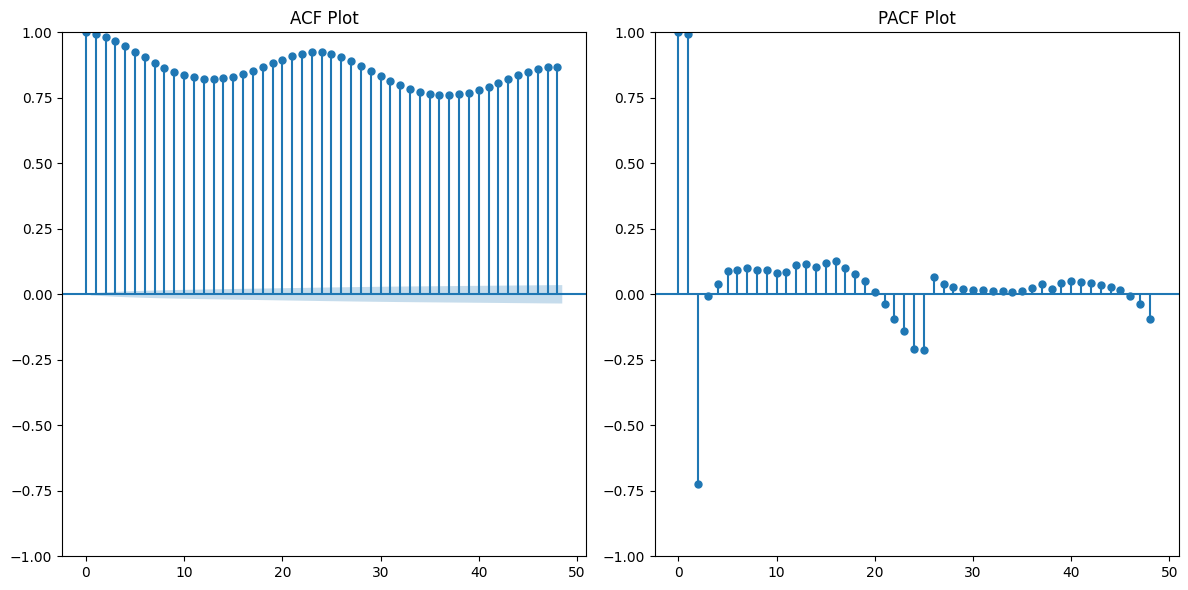

In [ ]:


hourly_data = st_louis_data.select_dtypes(include=[np.number]).resample('H').mean()



plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(hourly_data['temp_2m'], lags=48, ax=plt.gca())
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(hourly_data['temp_2m'], lags=48, ax=plt.gca())
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


This plot suggests that there is some trend or seasonality in the data

# Auto ARIMA

In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt


# Resample to hourly frequency and compute the mean (if needed)
hourly_data = st_louis_data.select_dtypes(include=[np.number]).resample('H').mean()

# Splitting data into train and test sets (80% train, 20% test)
train_size = int(len(hourly_data) * 0.8)
train, test = hourly_data[:train_size], hourly_data[train_size:]

# Use auto_arima to automatically determine the best SARIMA parameters
model = auto_arima(
    train['temp_2m'],       # Target variable
    start_p=1, start_q=1,   # Start values for p and q
    max_p=5, max_q=5,       # Maximum values for p and q
    seasonal=True,          # Enable seasonal SARIMA
    m=24,                   # Seasonal period (e.g., 24 for hourly data with daily seasonality)
    start_P=0, start_Q=0,   # Start values for seasonal P and Q
    max_P=2, max_Q=2,       # Maximum values for seasonal P and Q
    trace=True,             # Display progress
    stepwise=True,          # Use stepwise search for faster computation
    suppress_warnings=True, # Suppress warnings
    error_action="ignore"   # Ignore non-convergence issues
)

# Print the best model summary
print("Best Model Summary:")
print(model.summary())

# Forecast on the test set
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Plot the forecast vs actual test values
plt.figure(figsize=(12, 6))
plt.plot(train['temp_2m'], label='Train Data', color='blue')
plt.plot(test['temp_2m'], label='Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.fill_between(
    test.index,
    conf_int[:, 0],
    conf_int[:, 1],
    color='pink',
    alpha=0.3
)
plt.title('SARIMA Forecast for St. Louis', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['temp_2m'], forecast)
mse = mean_squared_error(test['temp_2m'], forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=565400.598, Time=11.50 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=710542.649, Time=1.96 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=537481.816, Time=83.49 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=582833.231, Time=96.11 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=710540.650, Time=1.13 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=565941.112, Time=3.80 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=525973.812, Time=368.73 sec


KeyboardInterrupt: 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

exog_vars = ['humidity_2m', 'wind_speed_10m', 'soil_temp_0_7cm','dew_point_2m','surface_pressure','precip','soil_temp_0_7cm']  # Replace with your actual columns
train_exog = train[exog_vars]
test_exog = test[exog_vars]


# Define the SARIMA model with the given parameters
model = SARIMAX(
    train['temp_2m'],  # Replace 'temp_2m' with your target column
    order=(1, 1, 0),   # ARIMA(p, d, q)
    seasonal_order=(1, 0, 0, 24),  # SARIMA(P, D, Q, m), where m=24 for daily seasonality
    exog=train_exog,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
results = model.fit()

# Print model summary
print(results.summary())



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15246D-01    |proj g|=  2.71171D-01

At iterate    5    f=  5.10105D-01    |proj g|=  8.47606D-02

At iterate   10    f=  5.09884D-01    |proj g|=  2.75962D-02

At iterate   15    f=  5.09873D-01    |proj g|=  1.26993D-02

At iterate   20    f=  5.09869D-01    |proj g|=  7.20547D-03

At iterate   25    f=  5.09869D-01    |proj g|=  9.13327D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     26     68      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


                                     SARIMAX Results                                      
Dep. Variable:                            temp_2m   No. Observations:               195501
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 24)   Log Likelihood              -99679.837
Date:                            Sat, 30 Nov 2024   AIC                         199379.673
Time:                                    21:29:20   BIC                         199481.505
Sample:                                01-01-2000   HQIC                        199409.675
                                     - 04-20-2022                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
humidity_2m         -0.3507      0.000  -1691.632      0.000      -0.351      -0.350
wind_speed_10m   

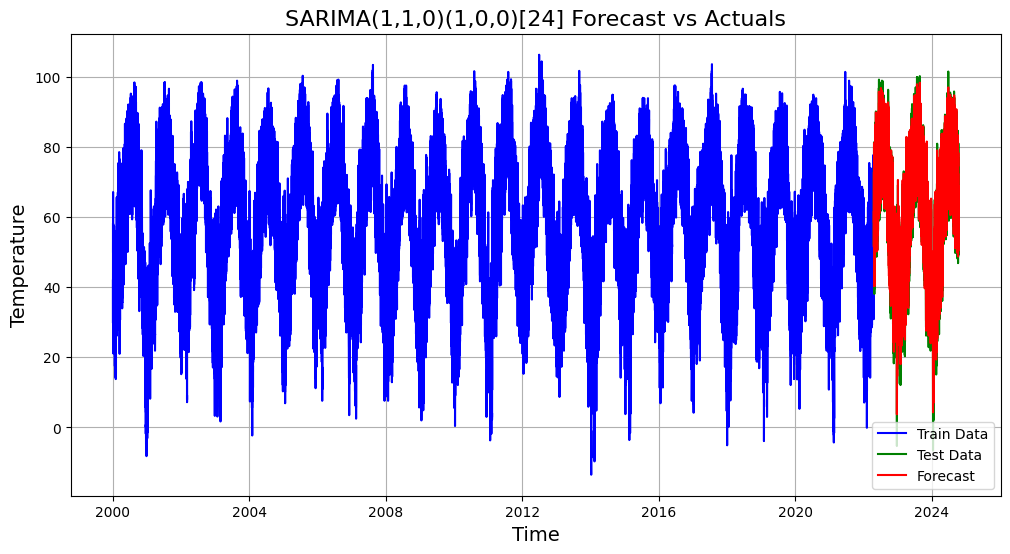

In [ ]:
# Forecast the test set
forecast = results.forecast(steps=len(test), exog=test_exog)  # Predict the number of steps in the test set

# Plot the forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(train['temp_2m'], label='Train Data', color='blue')
plt.plot(test['temp_2m'], label='Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('SARIMA(1,1,0)(1,0,0)[24] Forecast vs Actuals', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

This plot indicates that our training results coincides with the test results and the future forecasts are not exactly accurate but they have captured most of the trends.

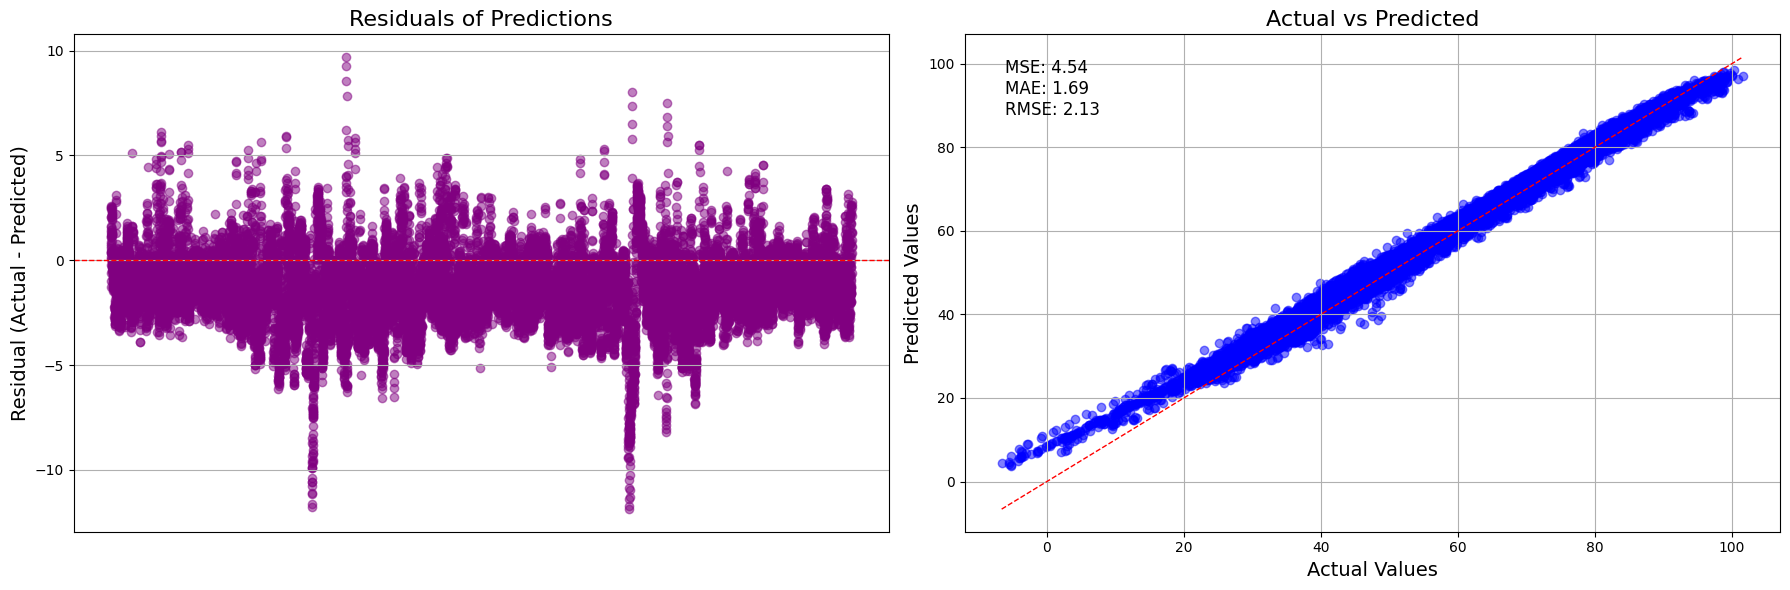

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'forecast' contains the predictions and 'test['temp_2m']' contains actuals
# Calculate residuals
residuals = test['temp_2m'] - forecast

# Calculate error metrics
mse = mean_squared_error(test['temp_2m'], forecast)
mae = mean_absolute_error(test['temp_2m'], forecast)
rmse = np.sqrt(mse)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Residuals
axes[0].scatter(range(len(residuals)), residuals, alpha=0.5, color='purple')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Residuals of Predictions', fontsize=16)
axes[0].set_ylabel('Residual (Actual - Predicted)', fontsize=14)
axes[0].grid(True)
axes[0].set_xticks([])  # Remove x-axis values

# Subplot 2: Actual vs Predicted
axes[1].scatter(test['temp_2m'], forecast, alpha=0.5, color='blue')
axes[1].plot([min(test['temp_2m']), max(test['temp_2m'])], [min(test['temp_2m']), max(test['temp_2m'])],
             color='red', linestyle='--', linewidth=1)  # Perfect prediction line
axes[1].set_title('Actual vs Predicted', fontsize=16)
axes[1].set_xlabel('Actual Values', fontsize=14)
axes[1].set_ylabel('Predicted Values', fontsize=14)
axes[1].grid(True)

# Display error metrics on the plot
text_x = 0.05
text_y = 0.95
axes[1].text(text_x, text_y, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}',
             transform=axes[1].transAxes, fontsize=12, verticalalignment='top')

# Adjust layout
plt.tight_layout()
plt.show()


Residuals of predictions - centering around 0 means that there is no systematic bias, but there are random scatterings which means that the underlying patterns have been captured well.
Actual vs Predicted - the model appears to have good performance but it can be improved.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(test['temp_2m'], forecast)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(test['temp_2m'], forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Extract AIC and BIC directly from the SARIMA model
aic = results.aic
bic = results.bic

print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Mean Squared Error (MSE): 4.537083317178958
Root Mean Squared Error (RMSE): 2.130043031766954
Mean Absolute Error (MAE): 1.6866352825284372
Akaike Information Criterion (AIC): 199379.6734469182
Bayesian Information Criterion (BIC): 199481.5053246481


In [ ]:
import pickle

# Save the model
results.save('sarima_model.pkl')

print("SARIMA model saved as 'sarima_model.pkl'")

SARIMA model saved as 'sarima_model.pkl'


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

# Load the saved model
loaded_model = SARIMAXResults.load('sarima_model.pkl')

print("SARIMA model loaded successfully")


SARIMA model loaded successfully


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("weather_cleaned.csv")

# Dataset Preparation Window based

In [4]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

# Assuming `df` already defined and contains a 'time' column
# Convert boolean columns to integers (0 and 1)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Encode the city names as integers
df['city_idx'] = df['location_city'].astype('category').cat.codes  # Numeric index for each city

features = ['humidity_2m', 'dew_point_2m', 'precip', 'snowfall', 'snow_depth', 
            'msl_pressure', 'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid',
            'cloud_cover_high', 'et0', 'vpd', 'wind_speed_10m', 'wind_dir_10m', 
            'soil_temp_0_7cm', 'soil_moisture_0_7cm', 'latitude', 'longitude'] + \
           [col for col in df.columns if col.startswith('weather_')]

target = 'temp_2m'
T = 3  # Number of timesteps
input_dim = len(features)

# Lists to hold training and testing data across all cities
X_train_list, y_train_list, city_train_list = [], [], []
X_test_list, y_test_list, city_test_list = [], [], []
time_train_list, time_test_list = [], []

# To compute normalization statistics
all_train_data = []

# Process each city independently
for city_id, city_data in df.groupby('city_idx'):
    city_data = city_data.sort_values(by='time').reset_index(drop=True)
    input_data = city_data[features].values
    targets = city_data[target].values
    time_values = city_data['time'].values  # Extract time as np array

    # Determine train size for the current city
    N = len(input_data) - T  # Total number of sequences
    train_size = int(0.90 * N)
    
    # Split data for normalization calculation (only on training set)
    train_data = input_data[:train_size]
    all_train_data.append(train_data)  # Collect all training data for global normalization
    
    # Convert to torch tensors
    input_data_tensor = torch.tensor(input_data, dtype=torch.float32)
    target_tensor = torch.tensor(targets, dtype=torch.float32)

    # Initialize train and test tensors for this city
    X_train_city = torch.zeros((train_size, T, input_dim), dtype=torch.float32)
    y_train_city = torch.zeros((train_size, 1), dtype=torch.float32)
    X_test_city = torch.zeros((N - train_size, T, input_dim), dtype=torch.float32)
    y_test_city = torch.zeros((N - train_size, 1), dtype=torch.float32)

    # We'll store time corresponding to the target at t+T
    time_train_city = []
    time_test_city = []
    
    # Prepare training sequences
    for t in range(train_size):
        X_train_city[t] = input_data_tensor[t:t + T]
        y_train_city[t] = target_tensor[t + T]
        # Store corresponding time for this target
        time_train_city.append(time_values[t + T])
    
    # Prepare testing sequences
    for i in range(N - train_size):
        t = i + train_size
        X_test_city[i] = input_data_tensor[t:t + T]
        y_test_city[i] = target_tensor[t + T]
        # Store corresponding time for this target
        time_test_city.append(time_values[t + T])
    
    # Convert time arrays to tensors (optional, you can keep them as arrays if easier)
    time_train_city = np.array(time_train_city)
    time_test_city = np.array(time_test_city)

    # Prepare city indices for train and test
    city_train_city = torch.full((train_size,), city_id, dtype=torch.long)
    city_test_city = torch.full((N - train_size,), city_id, dtype=torch.long)
    
    # Append city-specific data to the main lists
    X_train_list.append(X_train_city)
    y_train_list.append(y_train_city)
    city_train_list.append(city_train_city)
    time_train_list.append(time_train_city)

    X_test_list.append(X_test_city)
    y_test_list.append(y_test_city)
    city_test_list.append(city_test_city)
    time_test_list.append(time_test_city)

# Concatenate all training data for normalization calculation
all_train_data = np.vstack(all_train_data)
train_mean = all_train_data.mean(axis=0)
train_std = all_train_data.std(axis=0)

# Concatenate all cities’ data to form the final tensors
X_train = torch.cat(X_train_list, dim=0)
y_train = torch.cat(y_train_list, dim=0)
city_train = torch.cat(city_train_list, dim=0)

X_test = torch.cat(X_test_list, dim=0)
y_test = torch.cat(y_test_list, dim=0)
city_test = torch.cat(city_test_list, dim=0)

time_train = np.concatenate(time_train_list)
time_test = np.concatenate(time_test_list)

# Normalize X_train and X_test
train_mean_tensor = torch.tensor(train_mean, dtype=torch.float32)
train_std_tensor = torch.tensor(train_std, dtype=torch.float32)

# Normalize along the feature dimension (last dimension)
X_train = (X_train - train_mean_tensor) / train_std_tensor
X_test = (X_test - train_mean_tensor) / train_std_tensor

# Print shapes to confirm the results
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("city_train shape:", city_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("city_test shape:", city_test.shape)
print("time_train shape:", time_train.shape)
print("time_test shape:", time_test.shape)



X_train shape: torch.Size([977490, 3, 31])
y_train shape: torch.Size([977490, 1])
city_train shape: torch.Size([977490])
X_test shape: torch.Size([108615, 3, 31])
y_test shape: torch.Size([108615, 1])
city_test shape: torch.Size([108615])
time_train shape: (977490,)
time_test shape: (108615,)


# 1D CNN

# Hyper Parameter Tuning

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class CNNModelWithEmbedding(nn.Module):
    def __init__(self, input_dim, num_channels1, num_channels2, embedding_dim, num_cities, dropout_rate):
        super(CNNModelWithEmbedding, self).__init__()
        
        # Embedding for city index
        self.city_embedding = nn.Embedding(num_embeddings=num_cities, embedding_dim=embedding_dim)
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_dim + embedding_dim, out_channels=num_channels1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=num_channels1, out_channels=num_channels2, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        
        # Fully connected layers
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(num_channels2 * (T // 2), 64)  # Adjust based on sequence length (T)
        self.fc2 = nn.Linear(64, 16)
        self.output = nn.Linear(16, 1)
        
    def forward(self, x, city_idx):
        # Add city embeddings
        city_emb = self.city_embedding(city_idx).unsqueeze(1).expand(-1, x.size(1), -1)
        x = torch.cat([x, city_emb], dim=2)
        
        # Permute for CNN (channels-first format)
        x = x.permute(0, 2, 1)
        
        # Pass through CNN layers
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        
        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)
        
        # Pass through fully connected layers
        x = self.dropout(self.fc1(x))
        x = self.relu(x)
        x = self.dropout(self.fc2(x))
        x = self.relu(x)
        x = self.output(x)
        
        return x


# Optuna objective function
def objective(trial):
    # Sample hyperparameters
    embedding_dim = trial.suggest_int("embedding_dim", 4, 16)
    num_channels1 = trial.suggest_int("num_channels1", 32, 128, step=16)
    num_channels2 = trial.suggest_int("num_channels2", 64, 256, step=16)
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])

    n_splits_per_city = 5
    tscv = TimeSeriesSplit(n_splits=n_splits_per_city)

    # Store city-specific splits
    city_splits = []

    for city in city_train.unique().tolist():  # Get unique city IDs
        city_mask = (city_train == city)
        city_X = X_train[city_mask]
        city_y = y_train[city_mask]
        
        # Subsample 50% of the data for faster tuning
        subsample_size = int(0.1 * len(city_X))
        subsample_indices = torch.arange(len(city_X))[:subsample_size]
        city_X = city_X[subsample_indices]
        city_y = city_y[subsample_indices]

        # Split city data temporally
        for train_idx, val_idx in tscv.split(city_X):
            city_splits.append((
                city_X[train_idx], city_X[val_idx],
                city_y[train_idx], city_y[val_idx],
                torch.full((len(train_idx),), city, dtype=torch.long),
                torch.full((len(val_idx),), city, dtype=torch.long)
            ))

    # Combine city-specific splits into global folds
    n_global_folds = 5
    global_folds = [[] for _ in range(n_global_folds)]

    for i, split in enumerate(city_splits):
        global_folds[i % n_global_folds].append(split)

    # Combine splits within each global fold
    combined_folds = []
    for fold in global_folds:
        X_train_fold = torch.cat([f[0] for f in fold])
        X_val_fold = torch.cat([f[1] for f in fold])
        y_train_fold = torch.cat([f[2] for f in fold])
        y_val_fold = torch.cat([f[3] for f in fold])
        city_train_fold = torch.cat([f[4] for f in fold])
        city_val_fold = torch.cat([f[5] for f in fold])

        combined_folds.append((X_train_fold, X_val_fold, y_train_fold, y_val_fold, city_train_fold, city_val_fold))

    # Perform training and validation
    fold_val_losses = []

    for X_train_fold, X_val_fold, y_train_fold, y_val_fold, city_train_fold, city_val_fold in combined_folds:
        train_dataset = torch.utils.data.TensorDataset(X_train_fold, y_train_fold, city_train_fold)
        val_dataset = torch.utils.data.TensorDataset(X_val_fold, y_val_fold, city_val_fold)

        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model
        model = CNNModelWithEmbedding(
            input_dim=X_train.shape[2],
            num_channels1=num_channels1,
            num_channels2=num_channels2,
            embedding_dim=embedding_dim,
            num_cities=city_train.max().item() + 1,
            dropout_rate=dropout_rate
        ).to(device)

        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        loss_fn = nn.MSELoss()

        # Train
        for epoch in range(5):  # Use fewer epochs for tuning
            model.train()
            for X_batch, y_batch, city_batch in train_loader:
                X_batch, y_batch, city_batch = X_batch.to(device), y_batch.to(device), city_batch.to(device)
                optimizer.zero_grad()
                output = model(X_batch, city_batch).squeeze()
                loss = loss_fn(output, y_batch)
                loss.backward()
                optimizer.step()

        # Validate
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch, city_batch in val_loader:
                X_batch, y_batch, city_batch = X_batch.to(device), y_batch.to(device), city_batch.to(device)
                output = model(X_batch, city_batch).squeeze()
                loss = loss_fn(output, y_batch)
                val_loss += loss.item() * X_batch.size(0)
        val_loss /= len(val_loader.dataset)
        fold_val_losses.append(val_loss)

    avg_val_loss = np.mean(fold_val_losses)
    return avg_val_loss


# Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, n_jobs=4)

# Best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best Validation Loss:", study.best_value)


[I 2024-11-30 22:50:47,179] A new study created in memory with name: no-name-358798cb-e4c3-4345-a8f4-93e7503feb9b


Using device: cuda


[I 2024-11-30 22:52:04,473] Trial 0 finished with value: 508.5619718593085 and parameters: {'embedding_dim': 14, 'num_channels1': 112, 'num_channels2': 64, 'dropout_rate': 0.33380184650556455, 'learning_rate': 0.0004517897758154489, 'batch_size': 256}. Best is trial 0 with value: 508.5619718593085.
[I 2024-11-30 22:52:09,717] Trial 2 finished with value: 524.1092224299067 and parameters: {'embedding_dim': 7, 'num_channels1': 128, 'num_channels2': 160, 'dropout_rate': 0.43173772319519815, 'learning_rate': 0.0004391997894515235, 'batch_size': 128}. Best is trial 0 with value: 508.5619718593085.
[I 2024-11-30 22:52:21,621] Trial 1 finished with value: 479.9785383203177 and parameters: {'embedding_dim': 12, 'num_channels1': 96, 'num_channels2': 64, 'dropout_rate': 0.30258056667255423, 'learning_rate': 0.0009312602462542639, 'batch_size': 128}. Best is trial 1 with value: 479.9785383203177.
[I 2024-11-30 22:52:59,435] Trial 3 finished with value: 463.97075144037717 and parameters: {'embeddi

Best Hyperparameters: {'embedding_dim': 9, 'num_channels1': 48, 'num_channels2': 80, 'dropout_rate': 0.260359973377371, 'learning_rate': 0.007897233987265898, 'batch_size': 64}
Best Validation Loss: 408.8404535665214


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class CNNModelWithEmbedding(nn.Module):
    def __init__(self, input_dim, num_channels1, num_channels2, embedding_dim, num_cities, dropout_rate):
        super(CNNModelWithEmbedding, self).__init__()
        
        # Embedding for city index
        self.city_embedding = nn.Embedding(num_embeddings=num_cities, embedding_dim=embedding_dim)
        
        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_dim + embedding_dim, out_channels=num_channels1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=num_channels1, out_channels=num_channels2, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        
        # Fully connected layers
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(num_channels2 * (T // 2), 64)  # Adjust based on sequence length (T)
        self.fc2 = nn.Linear(64, 16)
        self.output = nn.Linear(16, 1)
        
    def forward(self, x, city_idx):
        # Add city embeddings
        city_emb = self.city_embedding(city_idx).unsqueeze(1).expand(-1, x.size(1), -1)
        x = torch.cat([x, city_emb], dim=2)
        
        # Permute for CNN (channels-first format)
        x = x.permute(0, 2, 1)
        
        # Pass through CNN layers
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        
        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)
        
        # Pass through fully connected layers
        x = self.dropout(self.fc1(x))
        x = self.relu(x)
        x = self.dropout(self.fc2(x))
        x = self.relu(x)
        x = self.output(x)
        
        return x
    
    
    

# Hyperparameters
input_dim = X_train.shape[2]  # Number of features
num_cities = city_train.max().item() + 1  # Total number of unique cities
epochs = 1000
batch_size = 64
embedding_dim = 9 # Dimension of the embedding layer
num_channels1=48
num_channels2=80
dropout_rate=0.25

# Initialize model, criterion, and optimizer
model =  model = CNNModelWithEmbedding(
            input_dim=X_train.shape[2],
            num_channels1=num_channels1,
            num_channels2=num_channels2,
            embedding_dim=embedding_dim,
            num_cities=city_train.max().item() + 1,
            dropout_rate=dropout_rate
        ).to(device).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=7e-3, weight_decay=1e-5)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
city_train_tensor = torch.tensor(city_train, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
city_test_tensor = torch.tensor(city_test, dtype=torch.long).to(device)

# DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor, city_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor, city_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Using device: cpu


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables to track the best model
best_val_loss = np.inf  # Set to infinity initially
best_checkpoint_path = "/home/research/a.naveen/denoise40/models/cnn/best_model.pth"

train_losses=[]
val_losses=[]
# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch, city_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch, city_batch)
        loss = loss_fn(output.squeeze(), y_batch.squeeze())
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)

    # Validation step
    model.eval()
    val_loss = 0
    
    if epoch%5==0:
        with torch.no_grad():
            for X_batch, y_batch, city_batch in test_loader:
                output = model(X_batch, city_batch)
                loss = loss_fn(output.squeeze(), y_batch.squeeze())
                val_loss += loss.item() * X_batch.size(0)

        # Calculate average losses
        train_loss /= len(train_loader.dataset)
        val_loss /= len(test_loader.dataset)

        # Append losses for plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # Save the model if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': train_loss,
                'val_loss': val_loss
            }, best_checkpoint_path)
            print(f"Best model saved at epoch {epoch+1} with validation loss: {val_loss:.4f}")


Epoch 1/1000, Train Loss: 86.2398, Validation Loss: 7.9235
Best model saved at epoch 1 with validation loss: 7.9235
Epoch 6/1000, Train Loss: 23.0107, Validation Loss: 8.6021
Epoch 11/1000, Train Loss: 22.5063, Validation Loss: 6.1876
Best model saved at epoch 11 with validation loss: 6.1876
Epoch 16/1000, Train Loss: 22.1113, Validation Loss: 3.4444
Best model saved at epoch 16 with validation loss: 3.4444
Epoch 21/1000, Train Loss: 21.9548, Validation Loss: 4.5751
Epoch 26/1000, Train Loss: 22.1569, Validation Loss: 4.3184
Epoch 31/1000, Train Loss: 21.8042, Validation Loss: 5.8662
Epoch 36/1000, Train Loss: 21.2109, Validation Loss: 4.4837
Epoch 41/1000, Train Loss: 19.3400, Validation Loss: 3.9116
Epoch 46/1000, Train Loss: 19.2736, Validation Loss: 3.4771
Epoch 51/1000, Train Loss: 19.3179, Validation Loss: 3.0226
Best model saved at epoch 51 with validation loss: 3.0226
Epoch 56/1000, Train Loss: 19.2099, Validation Loss: 4.8454
Epoch 61/1000, Train Loss: 19.3394, Validation Loss

# Inference

In [6]:
# Recreate the model with the same architecture
model  = CNNModelWithEmbedding(
            input_dim=X_train.shape[2],
            num_channels1=num_channels1,
            num_channels2=num_channels2,
            embedding_dim=embedding_dim,
            num_cities=city_train.max().item() + 1,
            dropout_rate=dropout_rate
        ).to(device).to(device)

# Load the saved checkpoint
checkpoint_path = "models/cnn/best_model.pth"
checkpoint = torch.load(checkpoint_path,map_location=device )

# Load model and optimizer state
model.load_state_dict(checkpoint['model_state_dict'])

# Set the model to evaluation mode
model.eval()

CNNModelWithEmbedding(
  (city_embedding): Embedding(5, 9)
  (conv1): Conv1d(40, 48, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(48, 80, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=80, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)

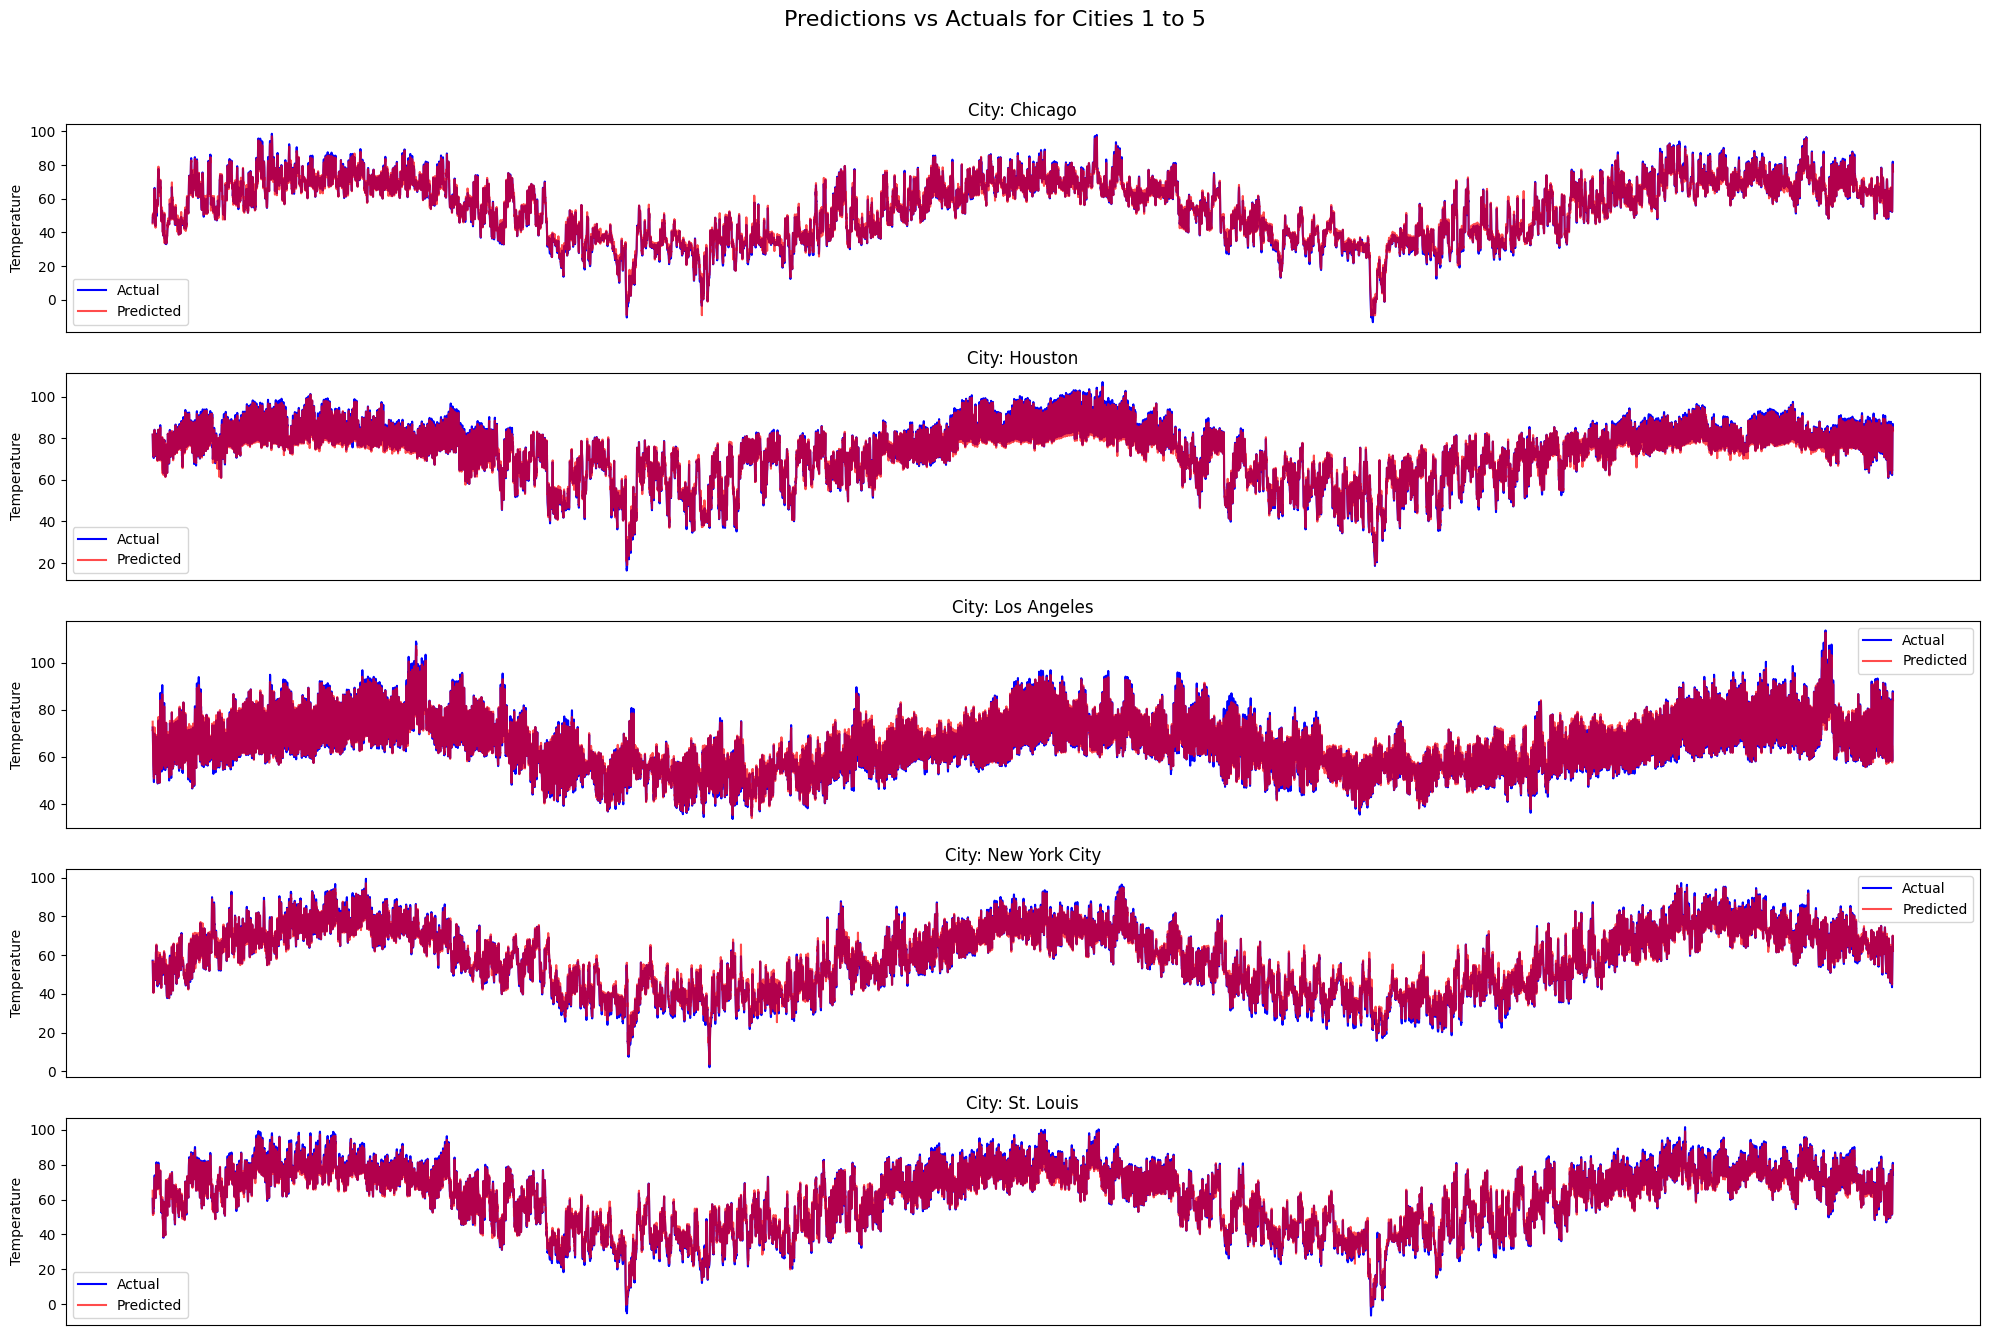

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create a mapping between city_idx and location_city
city_mapping = df[['city_idx', 'location_city']].drop_duplicates()

# Create a dictionary to map city_idx to city names
city_name_mapping = dict(zip(city_mapping['city_idx'], city_mapping['location_city']))

# Generate predictions on the test set, grouped by city
model.eval()
predictions = []
actuals = []
city_indices = []

with torch.no_grad():
    for X_batch, y_batch, city_batch in test_loader:
        output = model(X_batch, city_batch)
        predictions.extend(output.cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())
        city_indices.extend(city_batch.cpu().numpy())

# Convert lists to NumPy arrays
predictions = np.array(predictions).squeeze()
actuals = np.array(actuals).squeeze()
city_indices = np.array(city_indices)

# Get unique city indices for plotting city-wise
unique_cities = np.unique(city_indices)
num_cities = len(unique_cities)

# Plot predictions vs actual values for each city with subplots, 5 per figure
cities_per_fig = 5
num_figs = int(np.ceil(num_cities / cities_per_fig))

for fig_num in range(num_figs):
    start_idx = fig_num * cities_per_fig
    end_idx = min(start_idx + cities_per_fig, num_cities)
    cities_to_plot = unique_cities[start_idx:end_idx]
    
    fig, axes = plt.subplots(len(cities_to_plot), 1, figsize=(20, 14))
    fig.suptitle(f'Predictions vs Actuals for Cities {start_idx + 1} to {end_idx}', fontsize=16)
    
    if len(cities_to_plot) == 1:
        axes = [axes]  # Ensure axes is iterable if only one subplot

    for ax, city_id in zip(axes, cities_to_plot):
        city_mask = city_indices == city_id
        city_predictions = predictions[city_mask]
        city_actuals = actuals[city_mask]
        
        # Get city name from mapping
        city_name = city_name_mapping.get(city_id, f"City ID {city_id}")
        
        ax.plot(city_actuals, label='Actual', color='blue')
        ax.plot(city_predictions, label='Predicted', color='red', alpha=0.7)
        ax.set_title(f'City: {city_name}')
        
        ax.set_ylabel('Temperature')
        # Remove x-axis values
        ax.set_xticks([])
        ax.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
    plt.show()


Actual vs Predicted plots for all the 5 cities: we can observe that the model is pretty good at forecasting the values. This means that the 1-D CNN model can capture the seasonality and trends of the weather forecasting model.

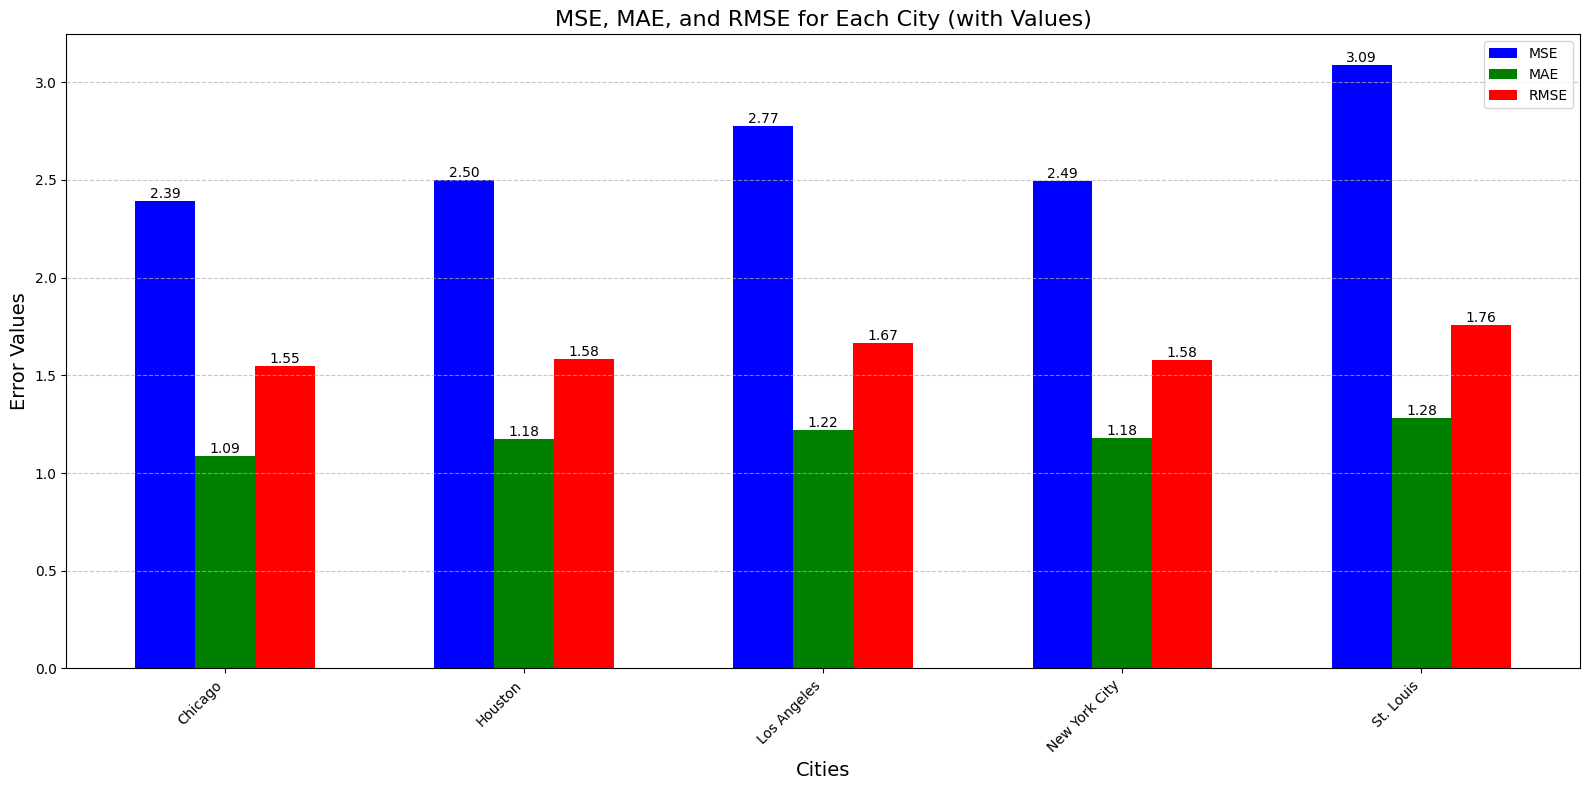

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create a mapping between city_idx and location_city
city_mapping = df[['city_idx', 'location_city']].drop_duplicates()

# Create a dictionary to map city_idx to city names
city_name_mapping = dict(zip(city_mapping['city_idx'], city_mapping['location_city']))

# Initialize a dictionary to store metrics for each city
city_metrics = {}

# Loop through each unique city index
for city_id in np.unique(city_indices):
    # Mask to filter data for the current city
    city_mask = city_indices == city_id
    city_predictions = predictions[city_mask]
    city_actuals = actuals[city_mask]
    
    # Calculate metrics
    mse = mean_squared_error(city_actuals, city_predictions)
    mae = mean_absolute_error(city_actuals, city_predictions)
    rmse = np.sqrt(mse)
    
    # Get the city name
    city_name = city_name_mapping.get(city_id, f"City ID {city_id}")
    
    # Store metrics
    city_metrics[city_name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse
    }

# Prepare data for plotting
cities = list(city_metrics.keys())
mse_values = [metrics["MSE"] for metrics in city_metrics.values()]
mae_values = [metrics["MAE"] for metrics in city_metrics.values()]
rmse_values = [metrics["RMSE"] for metrics in city_metrics.values()]

# Plot MSE, MAE, and RMSE as bar charts
x = np.arange(len(cities))  # City indices for the x-axis

plt.figure(figsize=(16, 8))

# Plot MSE
mse_bars = plt.bar(x - 0.2, mse_values, width=0.2, label='MSE', color='blue')

# Plot MAE
mae_bars = plt.bar(x, mae_values, width=0.2, label='MAE', color='green')

# Plot RMSE
rmse_bars = plt.bar(x + 0.2, rmse_values, width=0.2, label='RMSE', color='red')

# Add values on top of bars
for bars, values in zip([mse_bars, mae_bars, rmse_bars], [mse_values, mae_values, rmse_values]):
    for bar, value in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            bar.get_height(),                  # Y position (top of the bar)
            f"{value:.2f}",                    # Value (rounded to 2 decimal places)
            ha='center', va='bottom', fontsize=10  # Alignment and font size
        )

# Add labels and title
plt.xticks(x, cities, rotation=45, ha='right')
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Error Values', fontsize=14)
plt.title('MSE, MAE, and RMSE for Each City (with Values)', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


This plot depicts the error values for each city. The gap between MSE and RMSE indicates the the significance of large error values across cities. Whereas, the MAE values indicate the robustness to outliers when compared to RMSE and MSE.

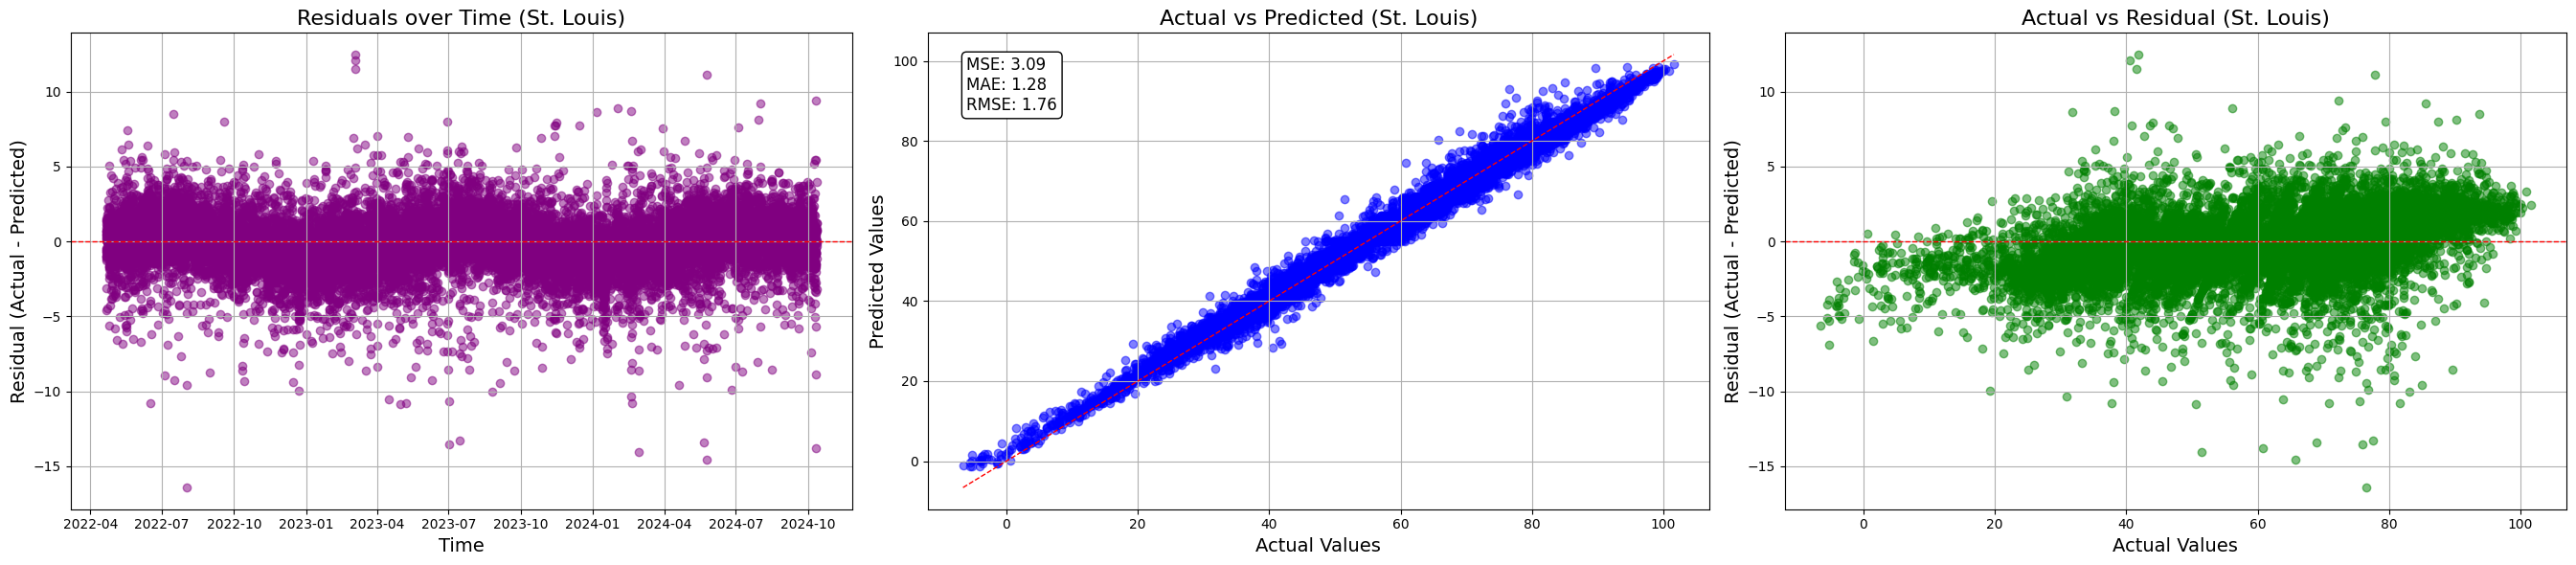

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Identify the city index for St. Louis
st_louis_idx = city_mapping[city_mapping['location_city'] == 'St. Louis']['city_idx'].values[0]

# Filter data for St. Louis
st_louis_mask = city_indices == st_louis_idx
st_louis_actuals = actuals[st_louis_mask]
st_louis_predictions = predictions[st_louis_mask]
st_louis_times = time_test[st_louis_mask]  # This should be your time array filtered similarly


st_louis_times = pd.to_datetime(st_louis_times)

# Calculate residuals for St. Louis
st_louis_residuals = st_louis_actuals - st_louis_predictions

# Calculate metrics for St. Louis
mse = mean_squared_error(st_louis_actuals, st_louis_predictions)
mae = mean_absolute_error(st_louis_actuals, st_louis_predictions)
rmse = np.sqrt(mse)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(27, 6))

# Subplot 1: Residuals over Time
axes[0].scatter(st_louis_times, st_louis_residuals, alpha=0.5, color='purple')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Residuals over Time (St. Louis)', fontsize=16)
axes[0].set_xlabel('Time', fontsize=14)
axes[0].set_ylabel('Residual (Actual - Predicted)', fontsize=14)
axes[0].grid(True)

# Subplot 2: Actual vs Predicted
axes[1].scatter(st_louis_actuals, st_louis_predictions, alpha=0.5, color='blue')
axes[1].plot([min(st_louis_actuals), max(st_louis_actuals)], 
             [min(st_louis_actuals), max(st_louis_actuals)], 
             color='red', linestyle='--', linewidth=1)  # Perfect prediction line
axes[1].set_title('Actual vs Predicted (St. Louis)', fontsize=16)
axes[1].set_xlabel('Actual Values', fontsize=14)
axes[1].set_ylabel('Predicted Values', fontsize=14)
axes[1].grid(True)

# Display error metrics on the second subplot
text_x = 0.05  # X-coordinate for text (relative to axis)
text_y = 0.95  # Y-coordinate for text (relative to axis)
axes[1].text(
    text_x, text_y, 
    f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}',
    transform=axes[1].transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Subplot 3: Actual vs Residual
axes[2].scatter(st_louis_actuals, st_louis_residuals, alpha=0.5, color='green')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[2].set_title('Actual vs Residual (St. Louis)', fontsize=16)
axes[2].set_xlabel('Actual Values', fontsize=14)
axes[2].set_ylabel('Residual (Actual - Predicted)', fontsize=14)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


These plots show much better prediction performance when compared to the SARIMA model. The SARIMA model had a slightly higher MSE,RMSE and MAE. The actual vs predicted plot for 1D-CNN is also better fitting when compared to SARIMA model.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Calculate model parameters (k)
k = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters (k): {k}")

# Step 2: Calculate residuals
residuals = actuals - predictions

# Step 3: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)

# Step 4: Calculate log-likelihood (assuming Gaussian distribution of residuals)
n = len(actuals)  # Number of samples
log_likelihood = -n / 2 * (np.log(2 * np.pi) + np.log(mse) + 1)

# Step 5: Calculate AIC and BIC
aic = 2 * k - 2 * log_likelihood
bic = np.log(n) * k - 2 * log_likelihood

# Step 6: Print all metrics
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")


Number of trainable parameters (k): 23694
RMSE: 1.628049373626709
MSE: 2.6505448818206787
MAE: 1.1893324851989746
AIC: 461498.14423513337
BIC: 688855.4565705799


# LSTM

# Hyperparameter tuning

# Timeseries GridSeach-Cross Validation

In [ ]:
# Randomly sample 10% of the data for tuning
sample_fraction = 0.1

# Subsample indices
train_indices = torch.randperm(X_train.size(0))[:int(sample_fraction * X_train.size(0))]
test_indices = torch.randperm(X_test.size(0))[:int(sample_fraction * X_test.size(0))]

# Create smaller datasets
X_train_sample = X_train[train_indices]
y_train_sample = y_train[train_indices]
city_train_sample = city_train[train_indices]



In [ ]:
y_train_sample.shape

torch.Size([97749, 1])

# Hyperparameter tuning with optuna

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Objective Function for Optuna
def objective(trial):
    # Sample hyperparameters
    embedding_dim = trial.suggest_int("embedding_dim", 4, 16)
    hidden_size = trial.suggest_categorical("hidden_size", [64,128, 256])
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [64,128, 512])

    n_splits_per_city = 5  # Split each city into 5 folds initially
    tscv = TimeSeriesSplit(n_splits=n_splits_per_city)

    # Collect all splits for grouping later
    city_splits = []

    for city in city_train.unique().tolist():  # Get unique city IDs
        city_mask = (city_train == city)
        city_X = X_train[city_mask]
        city_y = y_train[city_mask]
        
        # Subsample 10% of the data for training
        subsample_size = int(0.5 * len(city_X))  # 10% of the data
        subsample_indices = torch.arange(len(city_X))[:subsample_size]
        city_X = city_X[subsample_indices]
        city_y = city_y[subsample_indices]

        for train_idx, val_idx in tscv.split(city_X):
            city_splits.append((
                city_X[train_idx], city_X[val_idx],
                city_y[train_idx], city_y[val_idx],
                torch.full((len(train_idx),), city, dtype=torch.long),
                torch.full((len(val_idx),), city, dtype=torch.long)
            ))

    # Group all city splits into 5 global folds
    n_global_folds = 5
    global_folds = [[] for _ in range(n_global_folds)]

    for i, split in enumerate(city_splits):
        global_folds[i % n_global_folds].append(split)

    # Combine splits within each global fold
    combined_folds = []
    for fold in global_folds:
        X_train_fold = torch.cat([f[0] for f in fold])
        X_val_fold = torch.cat([f[1] for f in fold])
        y_train_fold = torch.cat([f[2] for f in fold])
        y_val_fold = torch.cat([f[3] for f in fold])
        city_train_fold = torch.cat([f[4] for f in fold])
        city_val_fold = torch.cat([f[5] for f in fold])

        combined_folds.append((X_train_fold, X_val_fold, y_train_fold, y_val_fold, city_train_fold, city_val_fold))

    # Perform training and validation
    fold_val_losses = []

    for X_train_fold, X_val_fold, y_train_fold, y_val_fold, city_train_fold, city_val_fold in combined_folds:
        train_dataset = torch.utils.data.TensorDataset(X_train_fold, y_train_fold, city_train_fold)
        val_dataset = torch.utils.data.TensorDataset(X_val_fold, y_val_fold, city_val_fold)

        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
        val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model
        model = LSTMModelWithEmbedding(
            input_dim=X_train.shape[2],
            num_cities=city_train.max().item() + 1,
            embedding_dim=embedding_dim,
            hidden_size=hidden_size,
            dropout=dropout
        ).to(device)

        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        loss_fn = nn.MSELoss()

        # Train
        for epoch in range(5):
            model.train()
            for X_batch, y_batch, city_batch in train_loader:
                X_batch, y_batch, city_batch = X_batch.to(device), y_batch.to(device), city_batch.to(device)
                optimizer.zero_grad()
                output = model(X_batch, city_batch).squeeze()
                loss = loss_fn(output, y_batch)
                loss.backward()
                optimizer.step()

        # Validate
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch, city_batch in val_loader:
                X_batch, y_batch, city_batch = X_batch.to(device), y_batch.to(device), city_batch.to(device)
                output = model(X_batch, city_batch).squeeze()
                loss = loss_fn(output, y_batch)
                val_loss += loss.item() * X_batch.size(0)
        val_loss /= len(val_loader.dataset)
        fold_val_losses.append(val_loss)

    avg_val_loss = np.mean(fold_val_losses)
    return avg_val_loss

# Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, n_jobs=4)

# Best Hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best Validation Loss:", study.best_value)


[I 2024-11-30 17:42:27,865] A new study created in memory with name: no-name-9ebd499b-0fb7-4a21-9550-acc449165783


Using device: cuda


[I 2024-11-30 17:47:32,264] Trial 1 finished with value: 118.84406284630361 and parameters: {'embedding_dim': 10, 'hidden_size': 64, 'dropout': 0.44288125308872184, 'learning_rate': 0.00019695756171797036, 'batch_size': 512}. Best is trial 1 with value: 118.84406284630361.
[I 2024-11-30 17:48:36,199] Trial 0 finished with value: 126.37420243361416 and parameters: {'embedding_dim': 11, 'hidden_size': 128, 'dropout': 0.49353769964802, 'learning_rate': 0.0024570901181206564, 'batch_size': 512}. Best is trial 1 with value: 118.84406284630361.
[I 2024-11-30 17:50:03,715] Trial 3 finished with value: 138.19905673589432 and parameters: {'embedding_dim': 11, 'hidden_size': 256, 'dropout': 0.2035363517233028, 'learning_rate': 0.008857727672201776, 'batch_size': 512}. Best is trial 1 with value: 118.84406284630361.
[I 2024-11-30 17:51:27,612] Trial 4 finished with value: 125.07662785495492 and parameters: {'embedding_dim': 14, 'hidden_size': 128, 'dropout': 0.2881888902012745, 'learning_rate': 0

Best Hyperparameters: {'embedding_dim': 7, 'hidden_size': 64, 'dropout': 0.39902845484042315, 'learning_rate': 0.00010163954880259448, 'batch_size': 128}
Best Validation Loss: 93.12889932121159


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



print("Using device:", device)

# LSTM Model with Embedding
class LSTMModelWithEmbedding(nn.Module):
    def __init__(self, input_dim, num_cities, embedding_dim, hidden_size, dropout):
        super().__init__()
        self.city_embedding = nn.Embedding(num_embeddings=num_cities, embedding_dim=embedding_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim + embedding_dim,
            hidden_size=hidden_size,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.linear1 = nn.Linear(hidden_size * 2, 64)
        self.linear2 = nn.Linear(64, 8)
        self.output_linear = nn.Linear(8, 1)

    def forward(self, x, city_idx):
        city_emb = self.city_embedding(city_idx).unsqueeze(1).expand(-1, x.size(1), -1)
        x = torch.cat([x, city_emb], dim=2)
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Output from the last timestep
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.output_linear(x)
        return x


# Hyperparameters
input_dim = X_train.shape[2]  # Number of features
num_cities = city_train.max().item() + 1  # Total number of unique cities
epochs = 1000
hidden_size=128
dropout=0.39
batch_size = 64
embedding_dim = 7 # Dimension of the embedding layer

# Initialize model, criterion, and optimizer
model = LSTMModelWithEmbedding(input_dim=input_dim, num_cities=num_cities, embedding_dim=embedding_dim,hidden_size=hidden_size,dropout=dropout).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
city_train_tensor = torch.tensor(city_train, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
city_test_tensor = torch.tensor(city_test, dtype=torch.long).to(device)

# DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor, city_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor, city_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Using device: cuda


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables to track the best model
best_val_loss = np.inf  # Set to infinity initially
best_checkpoint_path = "/home/research/a.naveen/denoise40/weather/lstm/best_model.pth"

train_losses=[]
val_losses=[]
# Training loop
for epoch in range(epochs):

    print(f"running_epoch {epoch}")
    model.train()
    train_loss = 0
    for X_batch, y_batch, city_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch, city_batch)
        loss = loss_fn(output.squeeze(), y_batch.squeeze())
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)

    # Validation step
    model.eval()
    val_loss = 0
    
    if epoch%5==0:
        with torch.no_grad():
            for X_batch, y_batch, city_batch in test_loader:
                output = model(X_batch, city_batch)
                loss = loss_fn(output.squeeze(), y_batch.squeeze())
                val_loss += loss.item() * X_batch.size(0)

        # Calculate average losses
        train_loss /= len(train_loader.dataset)
        val_loss /= len(test_loader.dataset)

        # Append losses for plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # Save the model if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': train_loss,
                'val_loss': val_loss
            }, best_checkpoint_path)
            print(f"Best model saved at epoch {epoch+1} with validation loss: {val_loss:.4f}")


running_epoch 0
Epoch 1/1000, Train Loss: 55.4320, Validation Loss: 2.3385
Best model saved at epoch 1 with validation loss: 2.3385
running_epoch 1
running_epoch 2
running_epoch 3
running_epoch 4
running_epoch 5
Epoch 6/1000, Train Loss: 2.0935, Validation Loss: 1.7872
Best model saved at epoch 6 with validation loss: 1.7872
running_epoch 6
running_epoch 7
running_epoch 8
running_epoch 9
running_epoch 10
Epoch 11/1000, Train Loss: 1.9219, Validation Loss: 1.6505
Best model saved at epoch 11 with validation loss: 1.6505
running_epoch 11
running_epoch 12
running_epoch 13
running_epoch 14
running_epoch 15
Epoch 16/1000, Train Loss: 1.7815, Validation Loss: 1.5297
Best model saved at epoch 16 with validation loss: 1.5297
running_epoch 16
running_epoch 17
running_epoch 18
running_epoch 19
running_epoch 20
Epoch 21/1000, Train Loss: 1.7287, Validation Loss: 1.4578
Best model saved at epoch 21 with validation loss: 1.4578
running_epoch 21
running_epoch 22
running_epoch 23
running_epoch 24
run

KeyboardInterrupt: 

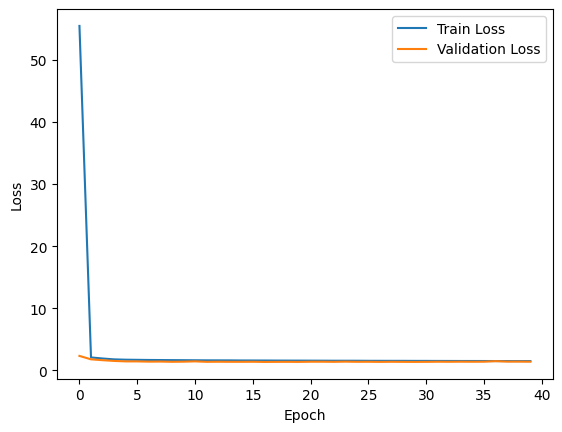

In [ ]:
# Plot train and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The model perfectly captures the successful model training with generalization to validation data. The low gap between training and validation loss indicates the absence of overfitting and proves the the model is fitting well with our data.

# Inference

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



print("Using device:", device)

# LSTM Model with Embedding
class LSTMModelWithEmbedding(nn.Module):
    def __init__(self, input_dim, num_cities, embedding_dim, hidden_size, dropout):
        super().__init__()
        self.city_embedding = nn.Embedding(num_embeddings=num_cities, embedding_dim=embedding_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim + embedding_dim,
            hidden_size=hidden_size,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.linear1 = nn.Linear(hidden_size * 2, 64)
        self.linear2 = nn.Linear(64, 8)
        self.output_linear = nn.Linear(8, 1)

    def forward(self, x, city_idx):
        city_emb = self.city_embedding(city_idx).unsqueeze(1).expand(-1, x.size(1), -1)
        x = torch.cat([x, city_emb], dim=2)
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Output from the last timestep
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.output_linear(x)
        return x


# Hyperparameters
input_dim = X_train.shape[2]  # Number of features
num_cities = city_train.max().item() + 1  # Total number of unique cities
epochs = 1000
hidden_size=128
dropout=0.39
batch_size = 64
embedding_dim = 7 # Dimension of the embedding layer


# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
city_train_tensor = torch.tensor(city_train, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
city_test_tensor = torch.tensor(city_test, dtype=torch.long).to(device)

# DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor, city_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor, city_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Using device: cpu


In [15]:
# Recreate the model with the same architecture
model = LSTMModelWithEmbedding(input_dim=input_dim, num_cities=num_cities, embedding_dim=embedding_dim,hidden_size=hidden_size,dropout=dropout).to(device)

# Load the saved checkpoint
checkpoint_path = "models/lstm/best_model.pth"
checkpoint = torch.load(checkpoint_path,map_location=device)

# Load model and optimizer state
model.load_state_dict(checkpoint['model_state_dict'])

# Set the model to evaluation mode
model.eval()

LSTMModelWithEmbedding(
  (city_embedding): Embedding(5, 7)
  (lstm): LSTM(38, 128, num_layers=2, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.39, inplace=False)
  (linear1): Linear(in_features=256, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=8, bias=True)
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

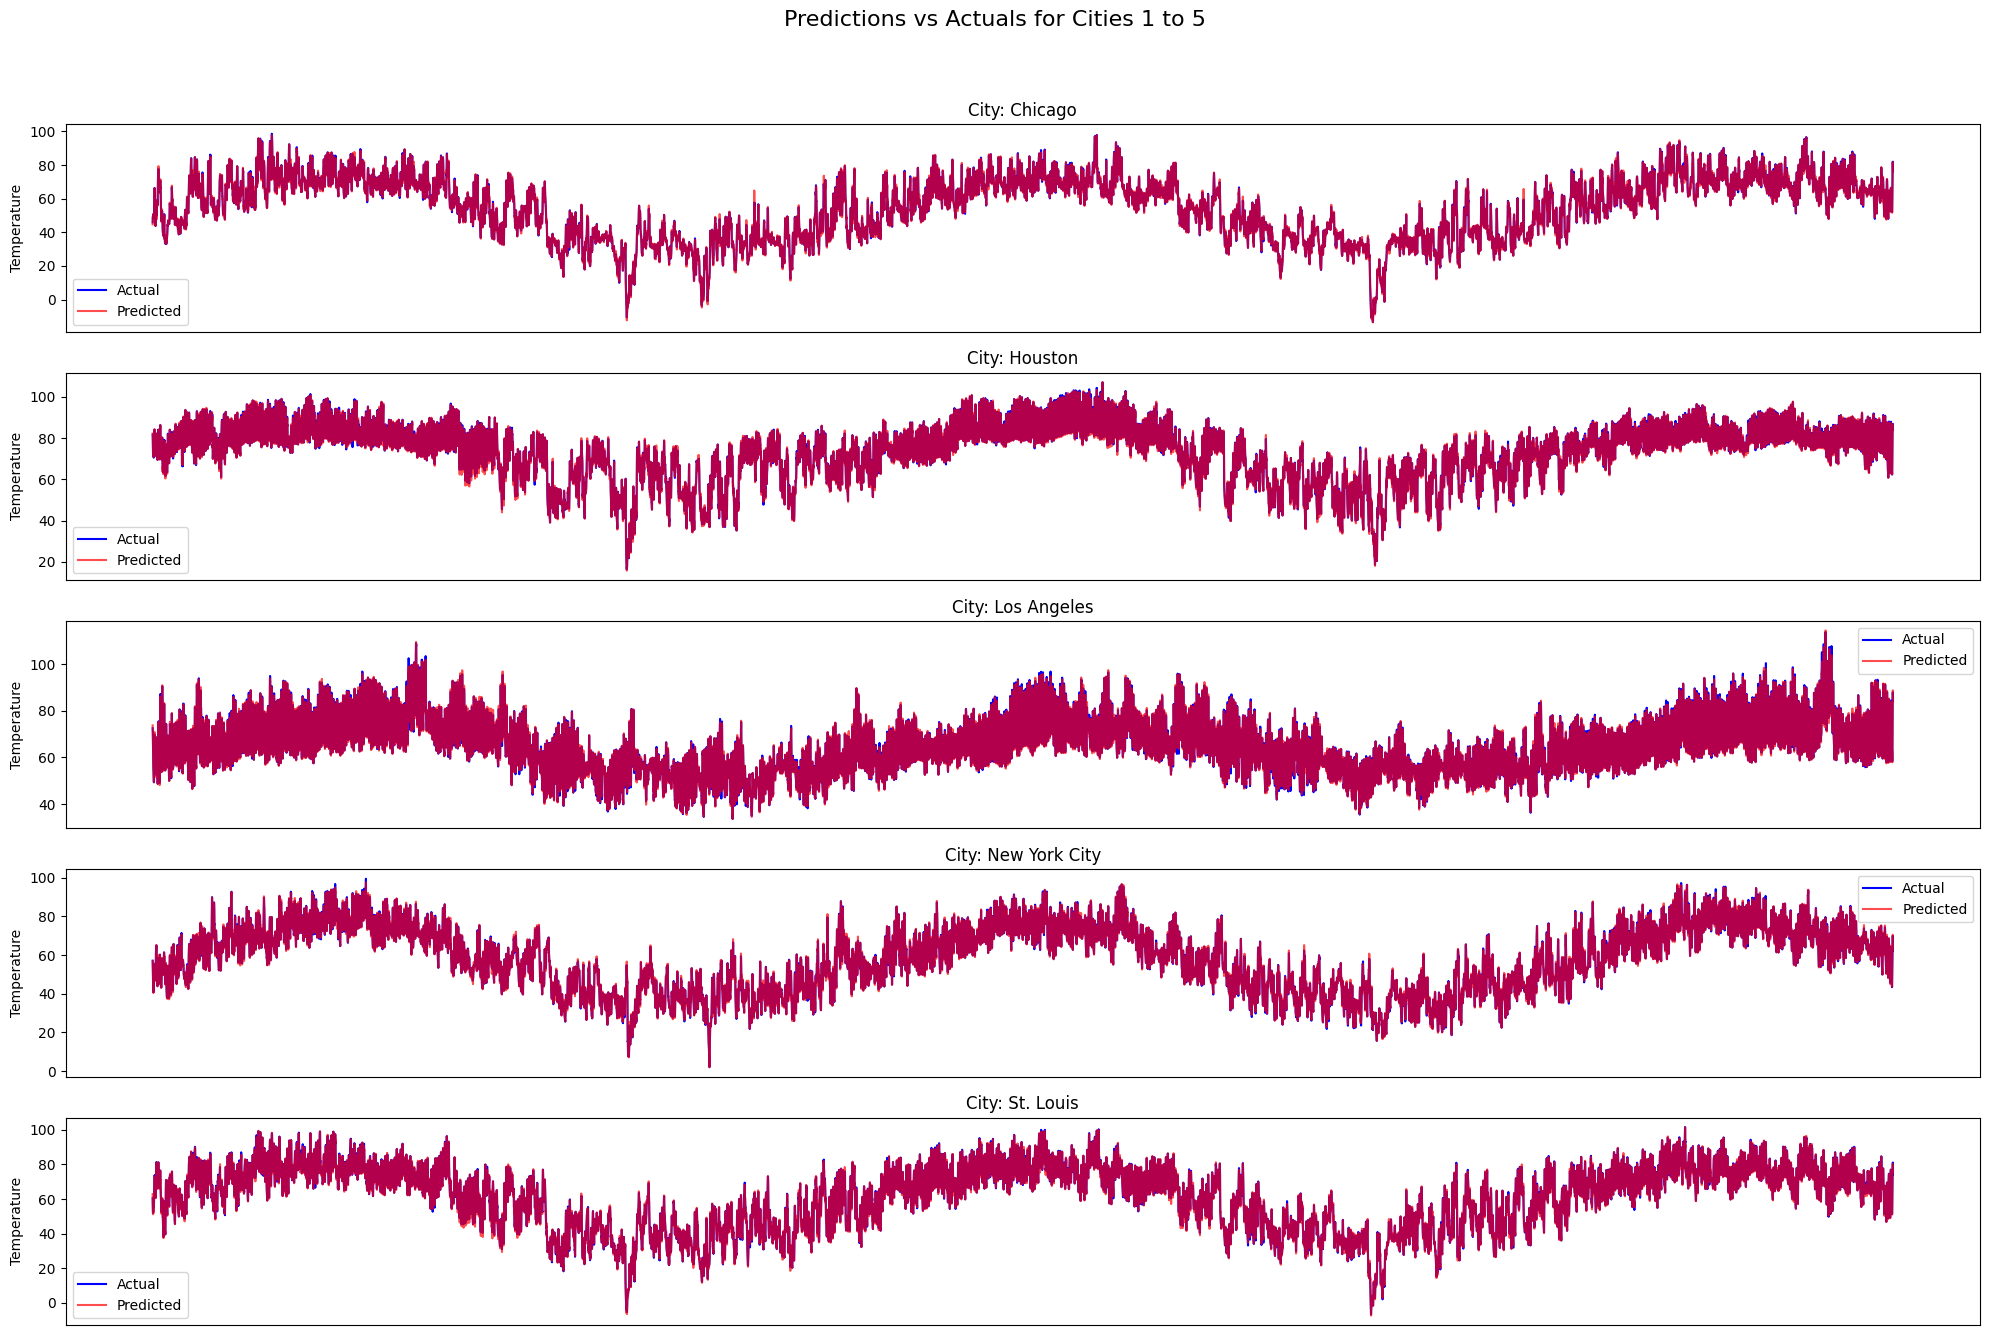

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Create a mapping between city_idx and location_city
city_mapping = df[['city_idx', 'location_city']].drop_duplicates()



# Create a dictionary to map city_idx to city names
city_name_mapping = dict(zip(city_mapping['city_idx'], city_mapping['location_city']))

# Generate predictions on the test set, grouped by city
model.eval()
predictions = []
actuals = []
city_indices = []

with torch.no_grad():
    for X_batch, y_batch, city_batch in test_loader:
        output = model(X_batch, city_batch)
        predictions.extend(output.cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())
        city_indices.extend(city_batch.cpu().numpy())

# Convert lists to NumPy arrays
predictions = np.array(predictions).squeeze()
actuals = np.array(actuals).squeeze()
city_indices = np.array(city_indices)

# Get unique city indices for plotting city-wise
unique_cities = np.unique(city_indices)
num_cities = len(unique_cities)

# Plot predictions vs actual values for each city with subplots, 5 per figure
cities_per_fig = 5
num_figs = int(np.ceil(num_cities / cities_per_fig))

for fig_num in range(num_figs):
    start_idx = fig_num * cities_per_fig
    end_idx = min(start_idx + cities_per_fig, num_cities)
    cities_to_plot = unique_cities[start_idx:end_idx]
    
    fig, axes = plt.subplots(len(cities_to_plot), 1, figsize=(20, 14))
    fig.suptitle(f'Predictions vs Actuals for Cities {start_idx + 1} to {end_idx}', fontsize=16)
    
    if len(cities_to_plot) == 1:
        axes = [axes]  # Ensure axes is iterable if only one subplot

    for ax, city_id in zip(axes, cities_to_plot):
        city_mask = city_indices == city_id
        city_predictions = predictions[city_mask]
        city_actuals = actuals[city_mask]
        
        # Get city name from mapping
        city_name = city_name_mapping.get(city_id, f"City ID {city_id}")
        
        ax.plot(city_actuals, label='Actual', color='blue')
        ax.plot(city_predictions, label='Predicted', color='red', alpha=0.7)
        ax.set_title(f'City: {city_name}')
        
        ax.set_ylabel('Temperature')
        # Remove x-axis values
        ax.set_xticks([])
        ax.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
    plt.show()


This plot describes how LSTM performs predictions. As we can see, there is a high correlation between the actual values and the predicted values.

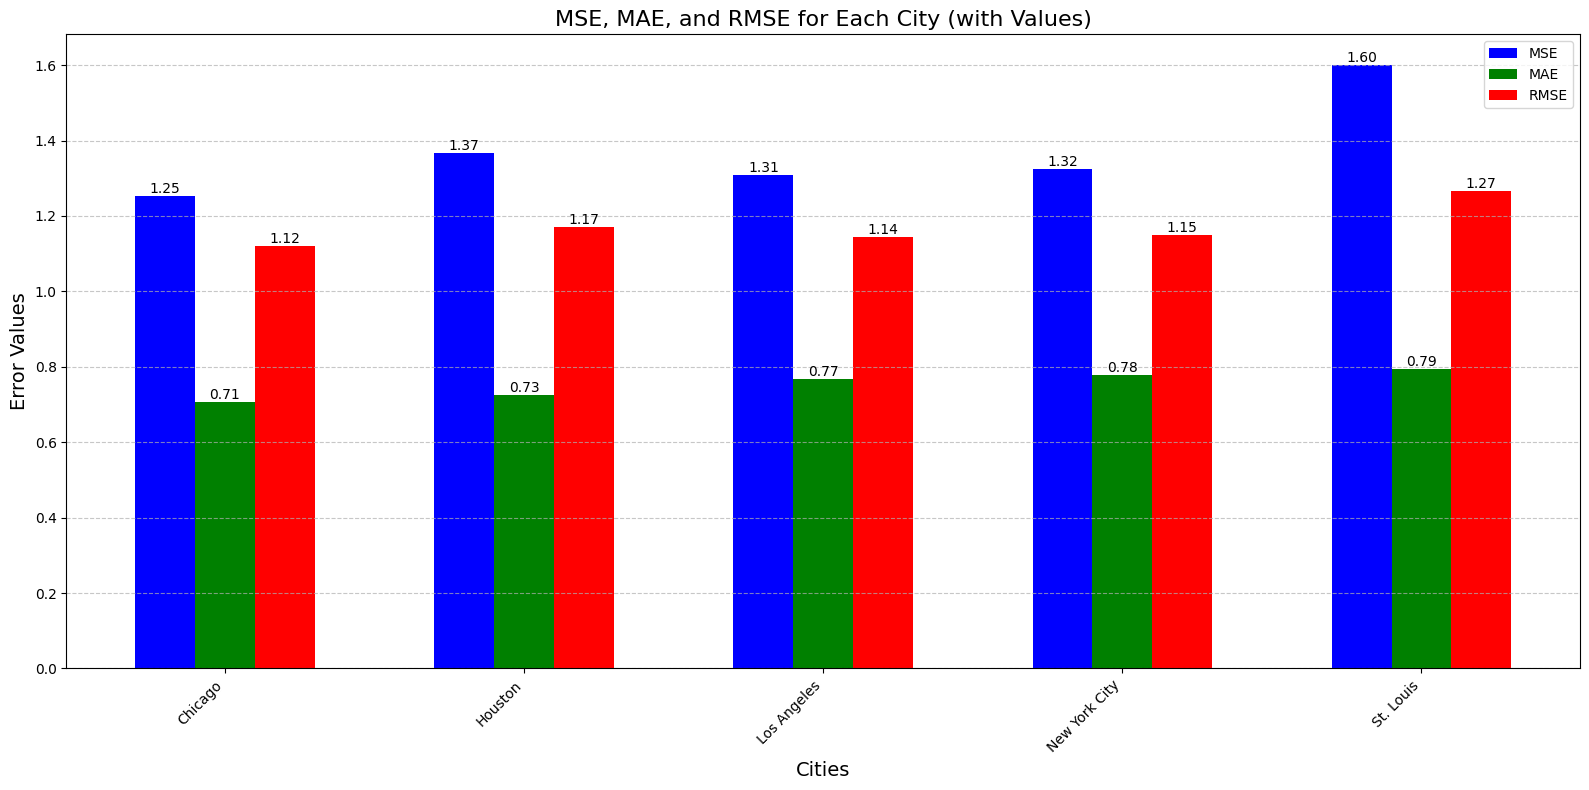

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create a dictionary to map city_idx to city names
city_name_mapping = dict(zip(city_mapping['city_idx'], city_mapping['location_city']))

# Initialize a dictionary to store metrics for each city
city_metrics = {}

# Loop through each unique city index
for city_id in np.unique(city_indices):
    # Mask to filter data for the current city
    city_mask = city_indices == city_id
    city_predictions = predictions[city_mask]
    city_actuals = actuals[city_mask]
    
    # Calculate metrics
    mse = mean_squared_error(city_actuals, city_predictions)
    mae = mean_absolute_error(city_actuals, city_predictions)
    rmse = np.sqrt(mse)
    
    # Get the city name
    city_name = city_name_mapping.get(city_id, f"City ID {city_id}")
    
    # Store metrics
    city_metrics[city_name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse
    }

# Prepare data for plotting
cities = list(city_metrics.keys())
mse_values = [metrics["MSE"] for metrics in city_metrics.values()]
mae_values = [metrics["MAE"] for metrics in city_metrics.values()]
rmse_values = [metrics["RMSE"] for metrics in city_metrics.values()]

# Plot MSE, MAE, and RMSE as bar charts
x = np.arange(len(cities))  # City indices for the x-axis

plt.figure(figsize=(16, 8))

# Plot MSE
mse_bars = plt.bar(x - 0.2, mse_values, width=0.2, label='MSE', color='blue')

# Plot MAE
mae_bars = plt.bar(x, mae_values, width=0.2, label='MAE', color='green')

# Plot RMSE
rmse_bars = plt.bar(x + 0.2, rmse_values, width=0.2, label='RMSE', color='red')

# Add values on top of bars
for bars, values in zip([mse_bars, mae_bars, rmse_bars], [mse_values, mae_values, rmse_values]):
    for bar, value in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            bar.get_height(),                  # Y position (top of the bar)
            f"{value:.2f}",                    # Value (rounded to 2 decimal places)
            ha='center', va='bottom', fontsize=10  # Alignment and font size
        )

# Add labels and title
plt.xticks(x, cities, rotation=45, ha='right')
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Error Values', fontsize=14)
plt.title('MSE, MAE, and RMSE for Each City (with Values)', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


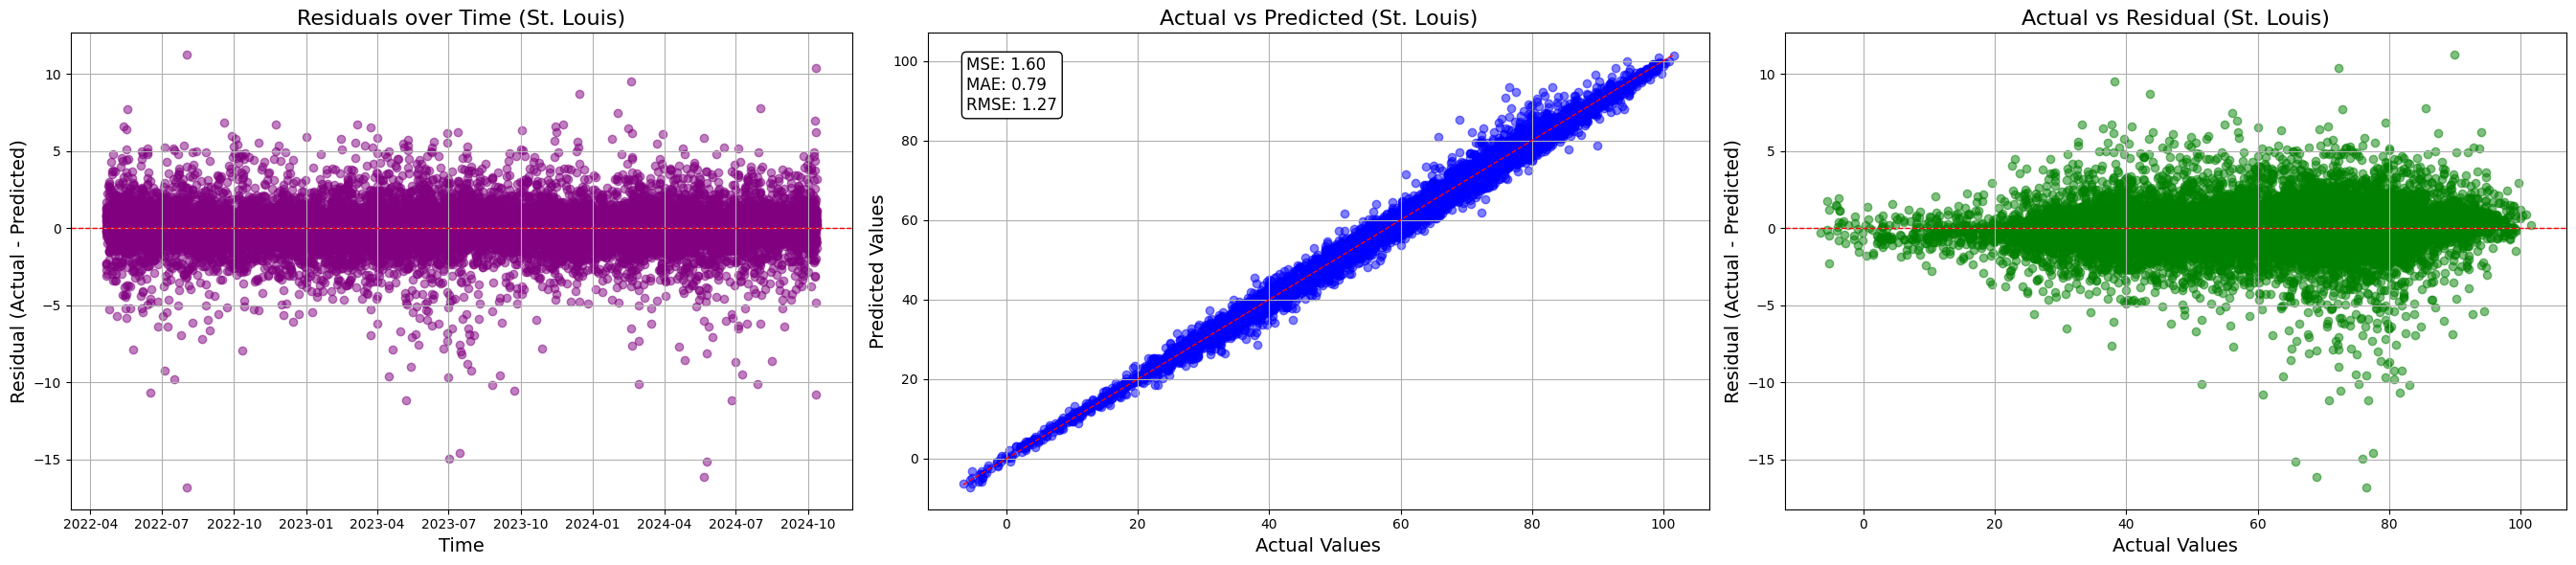

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Identify the city index for St. Louis
st_louis_idx = city_mapping[city_mapping['location_city'] == 'St. Louis']['city_idx'].values[0]

# Filter data for St. Louis
st_louis_mask = city_indices == st_louis_idx
st_louis_actuals = actuals[st_louis_mask]
st_louis_predictions = predictions[st_louis_mask]
st_louis_times = time_test[st_louis_mask]  # This should be your time array filtered similarly


st_louis_times = pd.to_datetime(st_louis_times)

# Calculate residuals for St. Louis
st_louis_residuals = st_louis_actuals - st_louis_predictions

# Calculate metrics for St. Louis
mse = mean_squared_error(st_louis_actuals, st_louis_predictions)
mae = mean_absolute_error(st_louis_actuals, st_louis_predictions)
rmse = np.sqrt(mse)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(27, 6))

# Subplot 1: Residuals over Time
axes[0].scatter(st_louis_times, st_louis_residuals, alpha=0.5, color='purple')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Residuals over Time (St. Louis)', fontsize=16)
axes[0].set_xlabel('Time', fontsize=14)
axes[0].set_ylabel('Residual (Actual - Predicted)', fontsize=14)
axes[0].grid(True)

# Subplot 2: Actual vs Predicted
axes[1].scatter(st_louis_actuals, st_louis_predictions, alpha=0.5, color='blue')
axes[1].plot([min(st_louis_actuals), max(st_louis_actuals)], 
             [min(st_louis_actuals), max(st_louis_actuals)], 
             color='red', linestyle='--', linewidth=1)  # Perfect prediction line
axes[1].set_title('Actual vs Predicted (St. Louis)', fontsize=16)
axes[1].set_xlabel('Actual Values', fontsize=14)
axes[1].set_ylabel('Predicted Values', fontsize=14)
axes[1].grid(True)

# Display error metrics on the second subplot
text_x = 0.05  # X-coordinate for text (relative to axis)
text_y = 0.95  # Y-coordinate for text (relative to axis)
axes[1].text(
    text_x, text_y, 
    f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}',
    transform=axes[1].transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Subplot 3: Actual vs Residual
axes[2].scatter(st_louis_actuals, st_louis_residuals, alpha=0.5, color='green')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[2].set_title('Actual vs Residual (St. Louis)', fontsize=16)
axes[2].set_xlabel('Actual Values', fontsize=14)
axes[2].set_ylabel('Residual (Actual - Predicted)', fontsize=14)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


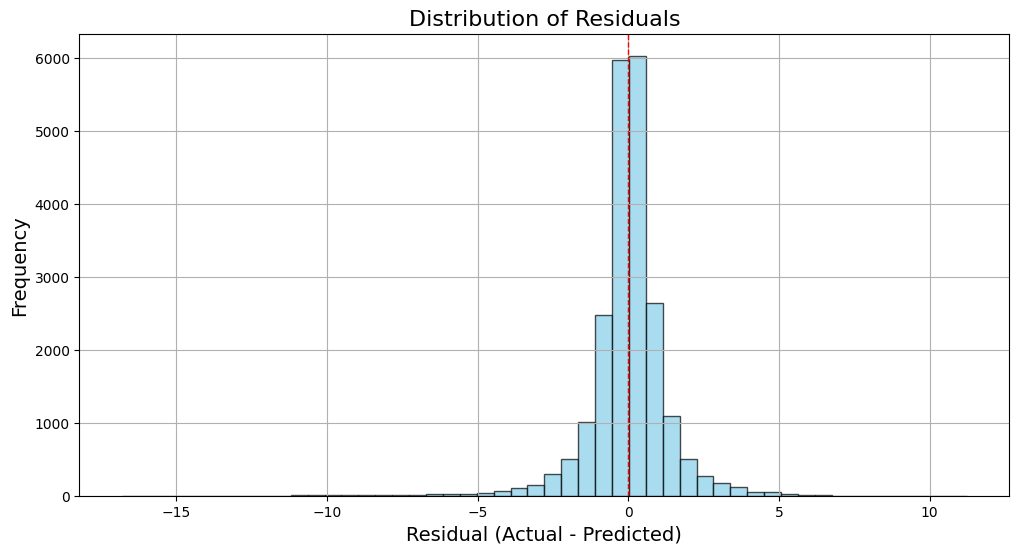

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of residuals
plt.figure(figsize=(12, 6))
plt.hist(st_louis_residuals, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residual (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


From this graph, it is implied that most of the residuals are centered around 0. This also implies that there aren't a lot of predicted values that deviate from the actual values, indicating higher accuracy, low loss.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Calculate model parameters (k)
k = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters (k): {k}")

# Step 2: Calculate residuals
residuals = actuals - predictions

# Step 3: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)

# Step 4: Calculate log-likelihood (assuming Gaussian distribution of residuals)
n = len(actuals)  # Number of samples
log_likelihood = -n / 2 * (np.log(2 * np.pi) + np.log(mse) + 1)

# Step 5: Calculate AIC and BIC
aic = 2 * k - 2 * log_likelihood
bic = np.log(n) * k - 2 * log_likelihood

# Step 6: Print all metrics
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")


Number of trainable parameters (k): 584308
RMSE: 1.1710172891616821
MSE: 1.3712815046310425
MAE: 0.7548356056213379
AIC: 1511146.7380037897
BIC: 7117912.014280487


# LSTM with Attention layer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# LSTM Model with Attention and Embedding
class LSTMModelWithAttention(nn.Module):
    def __init__(self, input_dim, num_cities, embedding_dim, hidden_size, dropout):
        super().__init__()
        self.city_embedding = nn.Embedding(num_embeddings=num_cities, embedding_dim=embedding_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim + embedding_dim,
            hidden_size=hidden_size,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        
        # Attention Layer
        self.attention = nn.Linear(hidden_size * 2, 1)  # Bidirectional LSTM output size is `hidden_size * 2`
        
        # Fully connected layers
        self.linear1 = nn.Linear(hidden_size * 2, 64)
        self.linear2 = nn.Linear(64, 8)
        self.output_linear = nn.Linear(8, 1)

    def forward(self, x, city_idx):
        # City embedding
        city_emb = self.city_embedding(city_idx).unsqueeze(1).expand(-1, x.size(1), -1)
        x = torch.cat([x, city_emb], dim=2)
        
        # LSTM
        lstm_output, _ = self.lstm(x)  # Shape: (batch_size, seq_len, hidden_size * 2)
        
        # Attention Mechanism
        attention_weights = torch.softmax(self.attention(lstm_output), dim=1)  # Shape: (batch_size, seq_len, 1)
        context_vector = torch.sum(attention_weights * lstm_output, dim=1)  # Weighted sum over timesteps
        
        # Fully connected layers
        x = self.dropout(context_vector)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.output_linear(x)
        return x

# Hyperparameters
input_dim = X_train.shape[2]  # Number of features
num_cities = city_train.max().item() + 1  # Total number of unique cities
epochs = 1000
hidden_size = 128
dropout = 0.39
batch_size = 64
embedding_dim = 7  # Dimension of the embedding layer

# Initialize model, criterion, and optimizer
model = LSTMModelWithAttention(input_dim=input_dim, num_cities=num_cities, embedding_dim=embedding_dim, hidden_size=hidden_size, dropout=dropout).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
city_train_tensor = torch.tensor(city_train, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
city_test_tensor = torch.tensor(city_test, dtype=torch.long).to(device)

# DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor, city_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor, city_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Using device: cuda


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables to track the best model
best_val_loss = np.inf  # Set to infinity initially
best_checkpoint_path = "/home/research/a.naveen/denoise40/weather/lstm/best_attention_model.pth"

train_losses=[]
val_losses=[]
# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch, city_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch, city_batch)
        loss = loss_fn(output.squeeze(), y_batch.squeeze())
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)

    # Validation step
    model.eval()
    val_loss = 0
    
    if epoch%5==0:
        with torch.no_grad():
            for X_batch, y_batch, city_batch in test_loader:
                output = model(X_batch, city_batch)
                loss = loss_fn(output.squeeze(), y_batch.squeeze())
                val_loss += loss.item() * X_batch.size(0)

        # Calculate average losses
        train_loss /= len(train_loader.dataset)
        val_loss /= len(test_loader.dataset)

        # Append losses for plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # Save the model if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': train_loss,
                'val_loss': val_loss
            }, best_checkpoint_path)
            print(f"Best model saved at epoch {epoch+1} with validation loss: {val_loss:.4f}")


Epoch 1/1000, Train Loss: 52.4353, Validation Loss: 2.3194
Best model saved at epoch 1 with validation loss: 2.3194
Epoch 6/1000, Train Loss: 2.1198, Validation Loss: 1.8095
Best model saved at epoch 6 with validation loss: 1.8095
Epoch 11/1000, Train Loss: 1.9548, Validation Loss: 1.7551
Best model saved at epoch 11 with validation loss: 1.7551
Epoch 16/1000, Train Loss: 1.8474, Validation Loss: 1.5817
Best model saved at epoch 16 with validation loss: 1.5817
Epoch 21/1000, Train Loss: 1.7777, Validation Loss: 1.5027
Best model saved at epoch 21 with validation loss: 1.5027
Epoch 26/1000, Train Loss: 1.7433, Validation Loss: 1.5193
Epoch 31/1000, Train Loss: 1.7130, Validation Loss: 1.4482
Best model saved at epoch 31 with validation loss: 1.4482
Epoch 36/1000, Train Loss: 1.6881, Validation Loss: 1.4296
Best model saved at epoch 36 with validation loss: 1.4296
Epoch 41/1000, Train Loss: 1.6746, Validation Loss: 1.4128
Best model saved at epoch 41 with validation loss: 1.4128
Epoch 46

KeyboardInterrupt: 

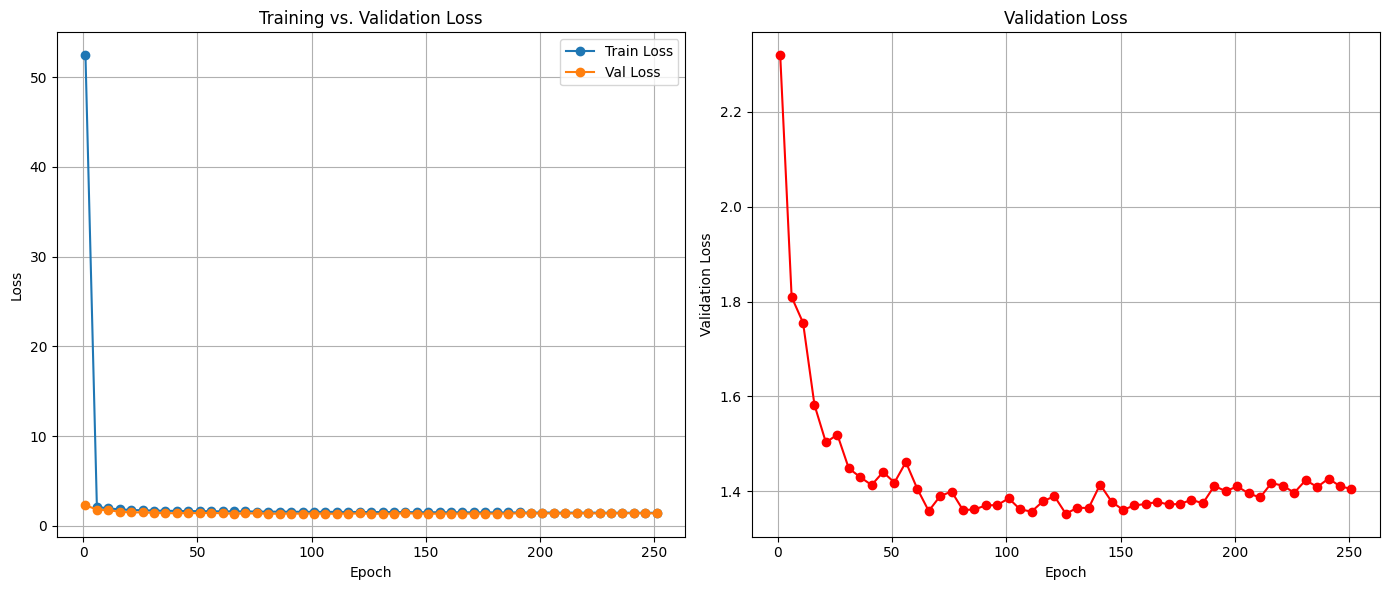

In [ ]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Left subplot: Training vs Validation Loss
ax1.plot(epochs, train_losses, label='Train Loss', marker='o')
ax1.plot(epochs, val_losses, label='Val Loss', marker='o')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training vs. Validation Loss')
ax1.legend()
ax1.grid(True)

# Right subplot: Only Validation Loss
ax2.plot(epochs, val_losses, label='Val Loss', color='red', marker='o')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Loss')
ax2.set_title('Validation Loss')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Inference

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# LSTM Model with Attention and Embedding
class LSTMModelWithAttention(nn.Module):
    def __init__(self, input_dim, num_cities, embedding_dim, hidden_size, dropout):
        super().__init__()
        self.city_embedding = nn.Embedding(num_embeddings=num_cities, embedding_dim=embedding_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim + embedding_dim,
            hidden_size=hidden_size,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        
        # Attention Layer
        self.attention = nn.Linear(hidden_size * 2, 1)  # Bidirectional LSTM output size is `hidden_size * 2`
        
        # Fully connected layers
        self.linear1 = nn.Linear(hidden_size * 2, 64)
        self.linear2 = nn.Linear(64, 8)
        self.output_linear = nn.Linear(8, 1)

    def forward(self, x, city_idx):
        # City embedding
        city_emb = self.city_embedding(city_idx).unsqueeze(1).expand(-1, x.size(1), -1)
        x = torch.cat([x, city_emb], dim=2)
        
        # LSTM
        lstm_output, _ = self.lstm(x)  # Shape: (batch_size, seq_len, hidden_size * 2)
        
        # Attention Mechanism
        attention_weights = torch.softmax(self.attention(lstm_output), dim=1)  # Shape: (batch_size, seq_len, 1)
        context_vector = torch.sum(attention_weights * lstm_output, dim=1)  # Weighted sum over timesteps
        
        # Fully connected layers
        x = self.dropout(context_vector)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.output_linear(x)
        return x

# Hyperparameters
input_dim = X_train.shape[2]  # Number of features
num_cities = city_train.max().item() + 1  # Total number of unique cities
epochs = 1000
hidden_size = 128
dropout = 0.39
batch_size = 64
embedding_dim = 7  # Dimension of the embedding layer



# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
city_train_tensor = torch.tensor(city_train, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
city_test_tensor = torch.tensor(city_test, dtype=torch.long).to(device)

# DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor, city_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor, city_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Using device: cpu


In [20]:
# Recreate the model with the same architecture
model = LSTMModelWithAttention(input_dim=input_dim, num_cities=num_cities, embedding_dim=embedding_dim, hidden_size=hidden_size, dropout=dropout).to(device)

# Load the saved checkpoint
checkpoint_path = "models/lstm/best_attention_model.pth"
checkpoint = torch.load(checkpoint_path,map_location=device)

# Load model and optimizer state
model.load_state_dict(checkpoint['model_state_dict'])

# Set the model to evaluation mode
model.eval()

LSTMModelWithAttention(
  (city_embedding): Embedding(5, 7)
  (lstm): LSTM(38, 128, num_layers=2, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.39, inplace=False)
  (attention): Linear(in_features=256, out_features=1, bias=True)
  (linear1): Linear(in_features=256, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=8, bias=True)
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

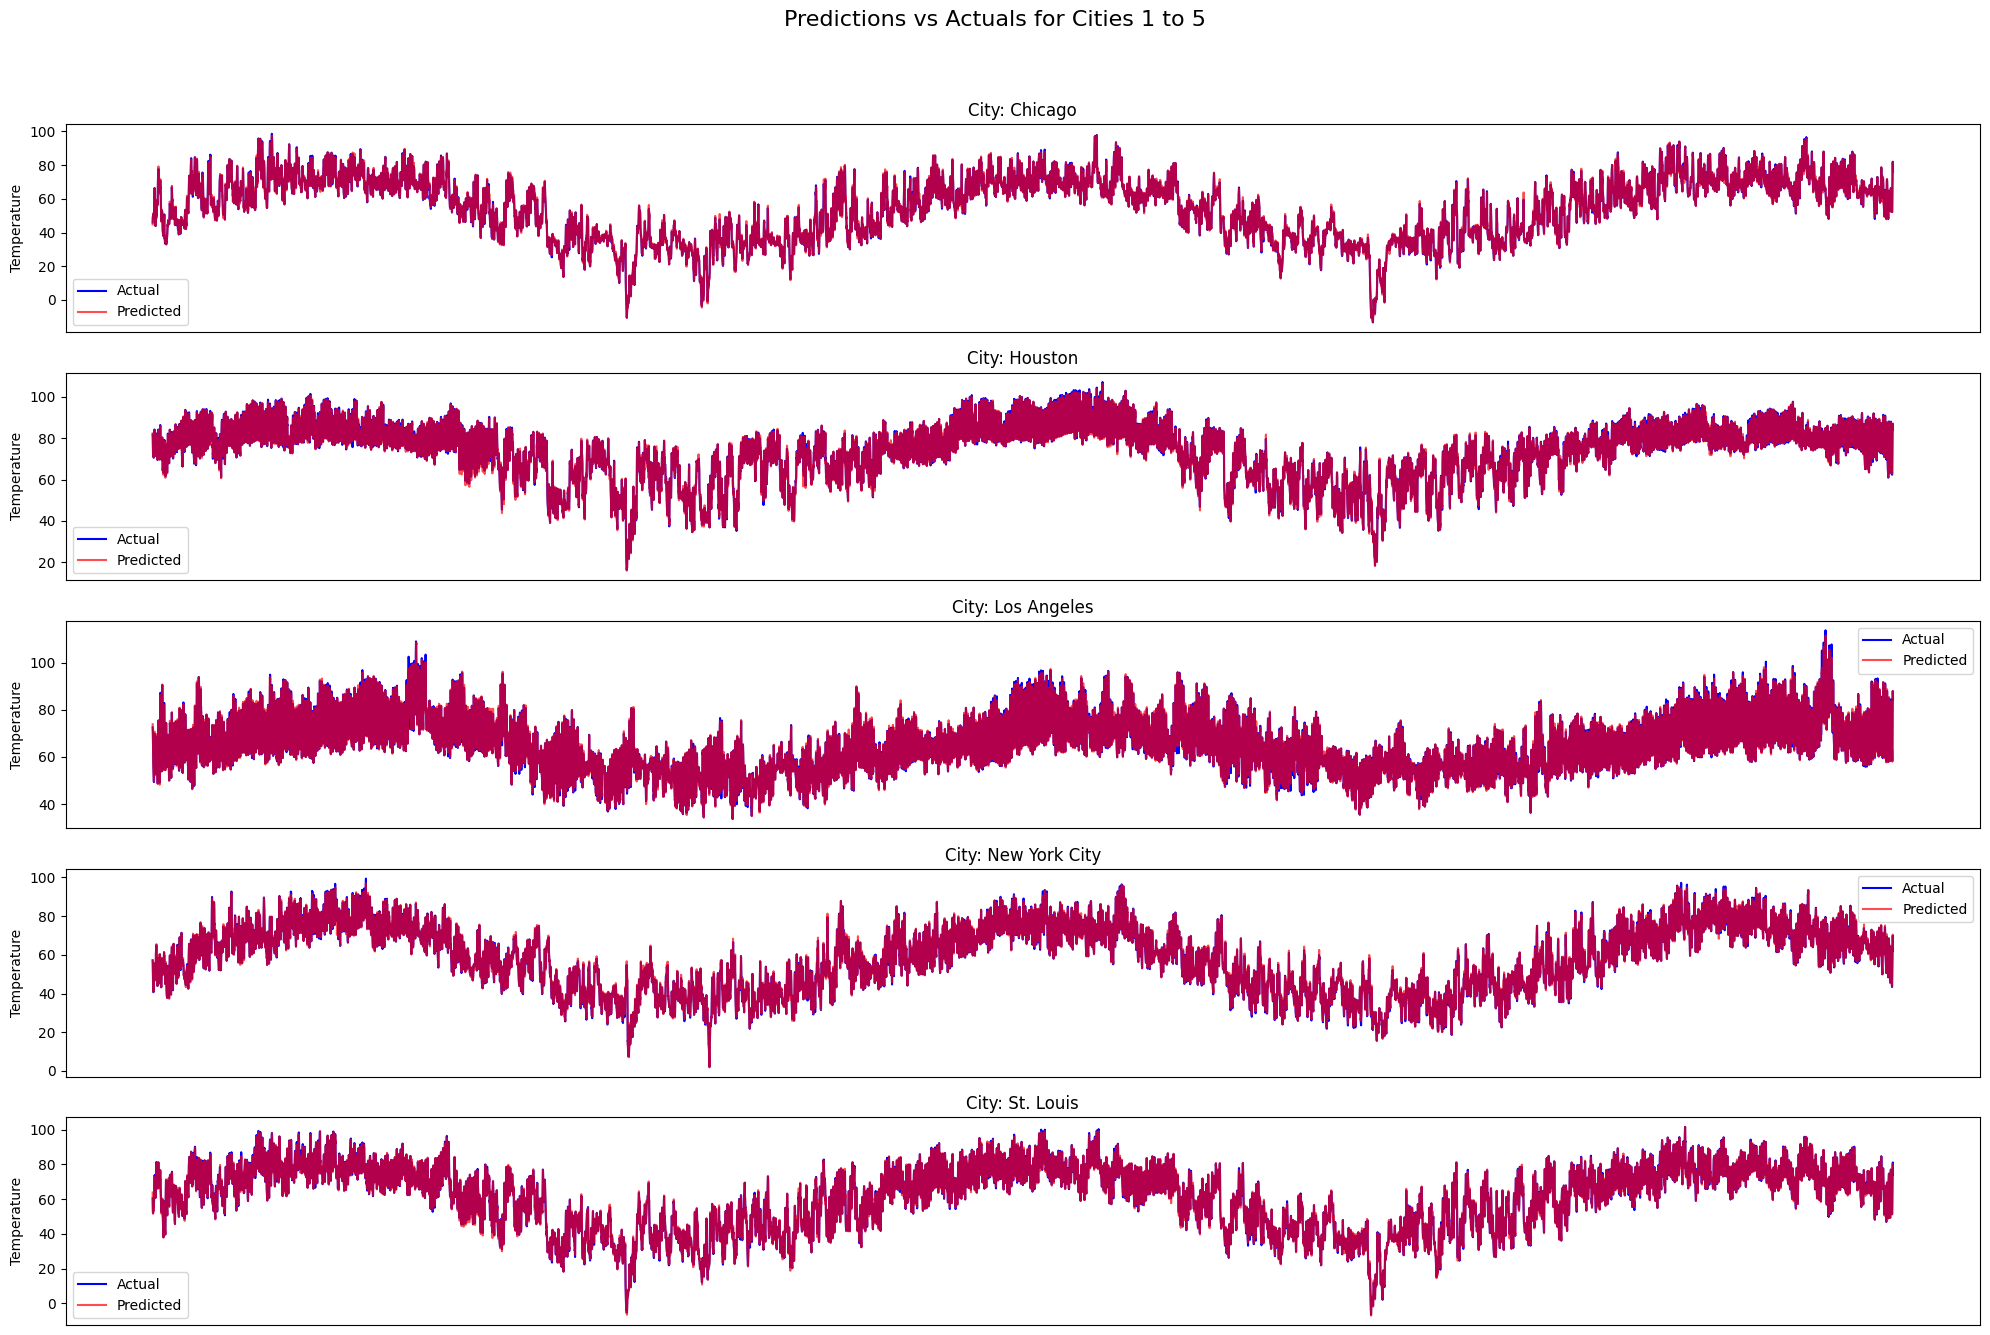

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary to map city_idx to city names
city_name_mapping = dict(zip(city_mapping['city_idx'], city_mapping['location_city']))

# Generate predictions on the test set, grouped by city
model.eval()
predictions = []
actuals = []
city_indices = []

with torch.no_grad():
    for X_batch, y_batch, city_batch in test_loader:
        output = model(X_batch, city_batch)
        predictions.extend(output.cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())
        city_indices.extend(city_batch.cpu().numpy())

# Convert lists to NumPy arrays
predictions = np.array(predictions).squeeze()
actuals = np.array(actuals).squeeze()
city_indices = np.array(city_indices)

# Get unique city indices for plotting city-wise
unique_cities = np.unique(city_indices)
num_cities = len(unique_cities)

# Plot predictions vs actual values for each city with subplots, 5 per figure
cities_per_fig = 5
num_figs = int(np.ceil(num_cities / cities_per_fig))

for fig_num in range(num_figs):
    start_idx = fig_num * cities_per_fig
    end_idx = min(start_idx + cities_per_fig, num_cities)
    cities_to_plot = unique_cities[start_idx:end_idx]
    
    fig, axes = plt.subplots(len(cities_to_plot), 1, figsize=(20, 14))
    fig.suptitle(f'Predictions vs Actuals for Cities {start_idx + 1} to {end_idx}', fontsize=16)
    
    if len(cities_to_plot) == 1:
        axes = [axes]  # Ensure axes is iterable if only one subplot

    for ax, city_id in zip(axes, cities_to_plot):
        city_mask = city_indices == city_id
        city_predictions = predictions[city_mask]
        city_actuals = actuals[city_mask]
        
        # Get city name from mapping
        city_name = city_name_mapping.get(city_id, f"City ID {city_id}")
        
        ax.plot(city_actuals, label='Actual', color='blue')
        ax.plot(city_predictions, label='Predicted', color='red', alpha=0.7)
        ax.set_title(f'City: {city_name}')
        
        ax.set_ylabel('Temperature')
        # Remove x-axis values
        ax.set_xticks([])
        ax.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
    plt.show()


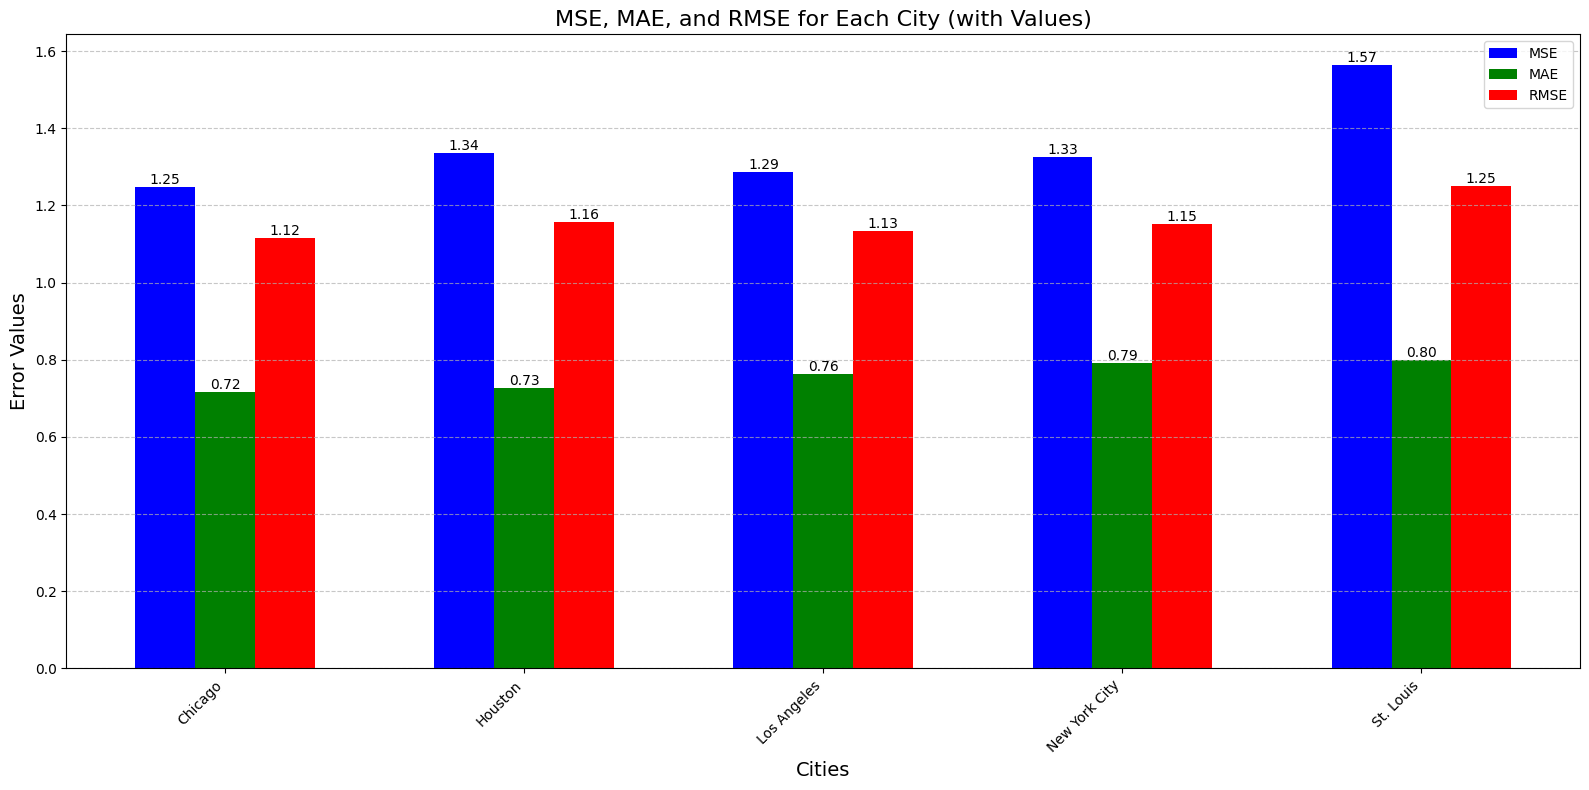

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create a dictionary to map city_idx to city names
city_name_mapping = dict(zip(city_mapping['city_idx'], city_mapping['location_city']))

# Initialize a dictionary to store metrics for each city
city_metrics = {}

# Loop through each unique city index
for city_id in np.unique(city_indices):
    # Mask to filter data for the current city
    city_mask = city_indices == city_id
    city_predictions = predictions[city_mask]
    city_actuals = actuals[city_mask]
    
    # Calculate metrics
    mse = mean_squared_error(city_actuals, city_predictions)
    mae = mean_absolute_error(city_actuals, city_predictions)
    rmse = np.sqrt(mse)
    
    # Get the city name
    city_name = city_name_mapping.get(city_id, f"City ID {city_id}")
    
    # Store metrics
    city_metrics[city_name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse
    }

# Prepare data for plotting
cities = list(city_metrics.keys())
mse_values = [metrics["MSE"] for metrics in city_metrics.values()]
mae_values = [metrics["MAE"] for metrics in city_metrics.values()]
rmse_values = [metrics["RMSE"] for metrics in city_metrics.values()]

# Plot MSE, MAE, and RMSE as bar charts
x = np.arange(len(cities))  # City indices for the x-axis

plt.figure(figsize=(16, 8))

# Plot MSE
mse_bars = plt.bar(x - 0.2, mse_values, width=0.2, label='MSE', color='blue')

# Plot MAE
mae_bars = plt.bar(x, mae_values, width=0.2, label='MAE', color='green')

# Plot RMSE
rmse_bars = plt.bar(x + 0.2, rmse_values, width=0.2, label='RMSE', color='red')

# Add values on top of bars
for bars, values in zip([mse_bars, mae_bars, rmse_bars], [mse_values, mae_values, rmse_values]):
    for bar, value in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            bar.get_height(),                  # Y position (top of the bar)
            f"{value:.2f}",                    # Value (rounded to 2 decimal places)
            ha='center', va='bottom', fontsize=10  # Alignment and font size
        )

# Add labels and title
plt.xticks(x, cities, rotation=45, ha='right')
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Error Values', fontsize=14)
plt.title('MSE, MAE, and RMSE for Each City (with Values)', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


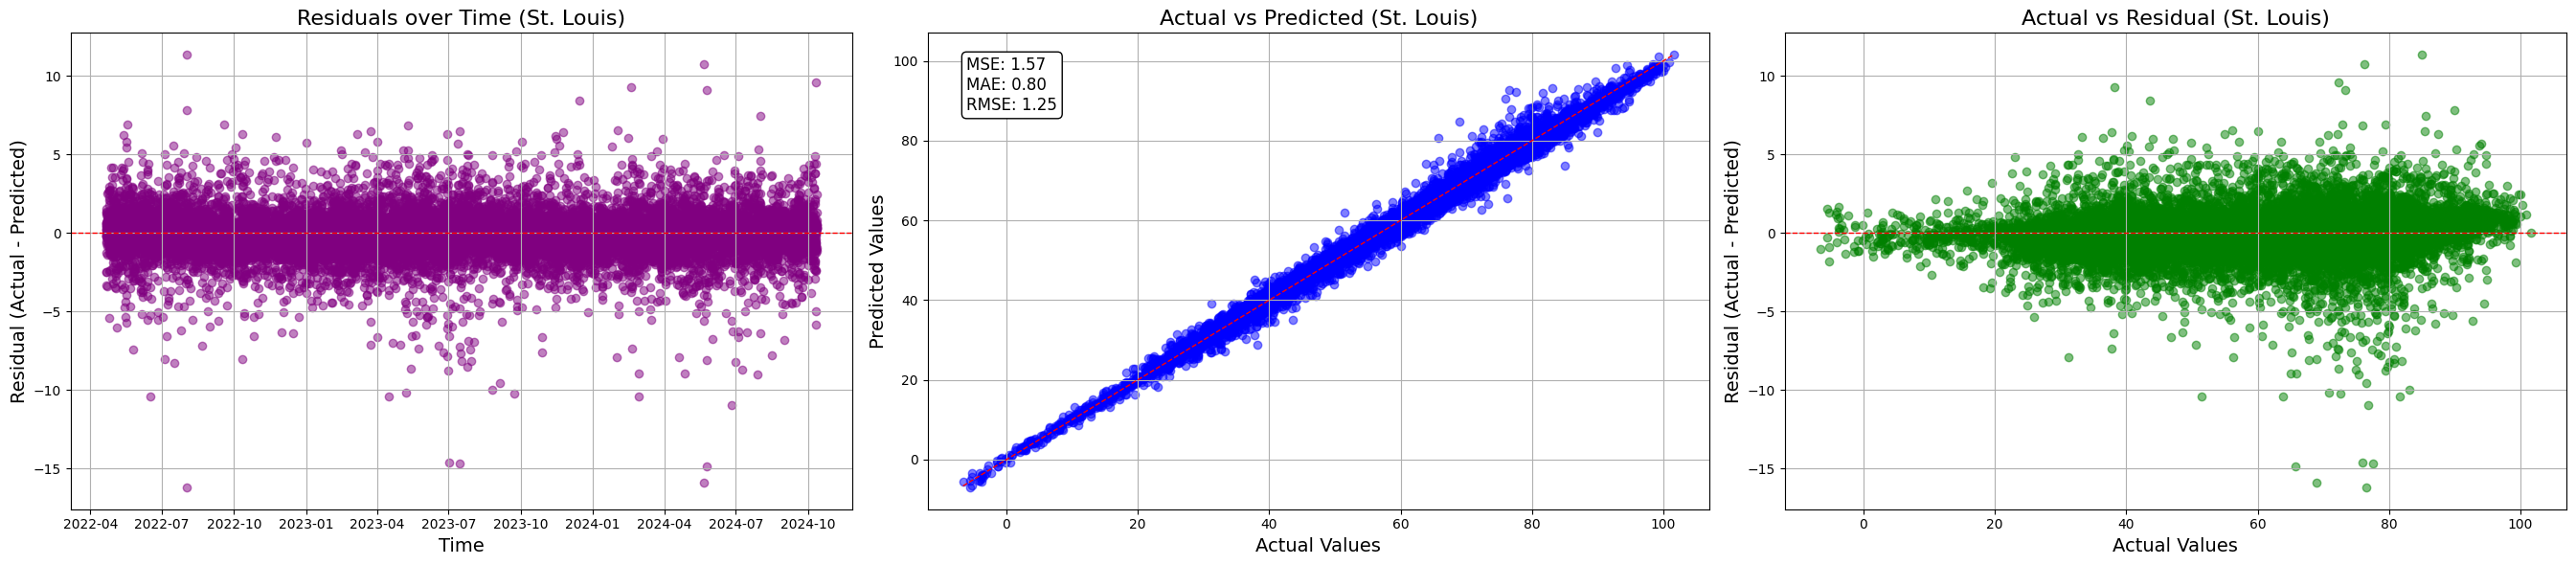

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Identify the city index for St. Louis
st_louis_idx = city_mapping[city_mapping['location_city'] == 'St. Louis']['city_idx'].values[0]

# Filter data for St. Louis
st_louis_mask = city_indices == st_louis_idx
st_louis_actuals = actuals[st_louis_mask]
st_louis_predictions = predictions[st_louis_mask]
st_louis_times = time_test[st_louis_mask]  # This should be your time array filtered similarly


st_louis_times = pd.to_datetime(st_louis_times)

# Calculate residuals for St. Louis
st_louis_residuals = st_louis_actuals - st_louis_predictions

# Calculate metrics for St. Louis
mse = mean_squared_error(st_louis_actuals, st_louis_predictions)
mae = mean_absolute_error(st_louis_actuals, st_louis_predictions)
rmse = np.sqrt(mse)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(27, 6))

# Subplot 1: Residuals over Time
axes[0].scatter(st_louis_times, st_louis_residuals, alpha=0.5, color='purple')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Residuals over Time (St. Louis)', fontsize=16)
axes[0].set_xlabel('Time', fontsize=14)
axes[0].set_ylabel('Residual (Actual - Predicted)', fontsize=14)
axes[0].grid(True)

# Subplot 2: Actual vs Predicted
axes[1].scatter(st_louis_actuals, st_louis_predictions, alpha=0.5, color='blue')
axes[1].plot([min(st_louis_actuals), max(st_louis_actuals)], 
             [min(st_louis_actuals), max(st_louis_actuals)], 
             color='red', linestyle='--', linewidth=1)  # Perfect prediction line
axes[1].set_title('Actual vs Predicted (St. Louis)', fontsize=16)
axes[1].set_xlabel('Actual Values', fontsize=14)
axes[1].set_ylabel('Predicted Values', fontsize=14)
axes[1].grid(True)

# Display error metrics on the second subplot
text_x = 0.05  # X-coordinate for text (relative to axis)
text_y = 0.95  # Y-coordinate for text (relative to axis)
axes[1].text(
    text_x, text_y, 
    f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}',
    transform=axes[1].transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Subplot 3: Actual vs Residual
axes[2].scatter(st_louis_actuals, st_louis_residuals, alpha=0.5, color='green')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[2].set_title('Actual vs Residual (St. Louis)', fontsize=16)
axes[2].set_xlabel('Actual Values', fontsize=14)
axes[2].set_ylabel('Residual (Actual - Predicted)', fontsize=14)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Calculate model parameters (k)
k = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters (k): {k}")

# Step 2: Calculate residuals
residuals = actuals - predictions

# Step 3: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)

# Step 4: Calculate log-likelihood (assuming Gaussian distribution of residuals)
n = len(actuals)  # Number of samples
log_likelihood = -n / 2 * (np.log(2 * np.pi) + np.log(mse) + 1)

# Step 5: Calculate AIC and BIC
aic = 2 * k - 2 * log_likelihood
bic = np.log(n) * k - 2 * log_likelihood

# Step 6: Print all metrics
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")


Number of trainable parameters (k): 584565
RMSE: 1.1628209352493286
MSE: 1.3521525859832764
MAE: 0.7592042684555054
AIC: 1510134.9295704954
BIC: 7119366.266000405


# Results and Insights

/var/folders/6k/v9cvk4n567l10yrzkj30zmcr0000gn/T/ipykernel_60232/2006713691.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if cell_val == best_values[col_idx - 1]:


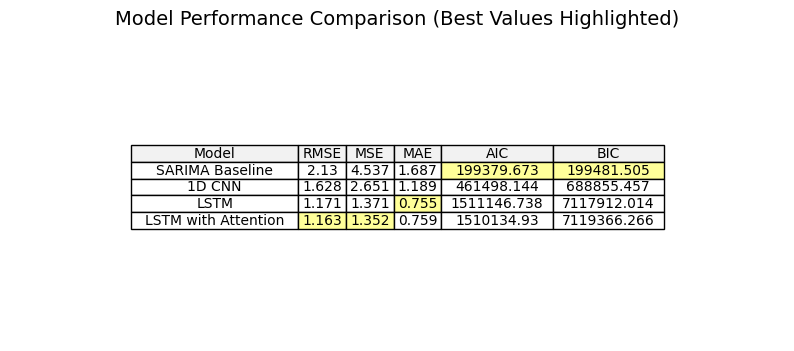

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data with corrected LSTM values
data_updated = {
    "Model": ["SARIMA Baseline", "1D CNN", "LSTM", "LSTM with Attention"],
    "RMSE": [2.130, 1.628, 1.171, 1.163],
    "MSE": [4.537, 2.651, 1.371, 1.352],
    "MAE": [1.687, 1.189, 0.755, 0.759],
    "AIC": [199379.673, 461498.144, 1511146.738, 1510134.930],
    "BIC": [199481.505, 688855.457, 7117912.014, 7119366.266]
}

# Convert data to a dataframe
df_updated = pd.DataFrame(data_updated)

# Identify the best values for each metric (lowest value)
best_values = df_updated[["RMSE", "MSE", "MAE", "AIC", "BIC"]].min()

# Highlight the best values in the table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')

# Create a table with conditional formatting for best values
table = ax.table(
    cellText=df_updated.values,
    colLabels=df_updated.columns,
    cellLoc='center',
    loc='center',
    colColours=["#f2f2f2"] * len(df_updated.columns),
)

# Highlight the best values in yellow
for row_idx, row in enumerate(df_updated.values):
    for col_idx, cell_val in enumerate(row[1:], start=1):  # Skip the first column (Model names)
        if cell_val == best_values[col_idx - 1]:
            table[(row_idx + 1, col_idx)].set_facecolor('#ffff99')  # Highlight best value

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_updated.columns))))

plt.title("Model Performance Comparison (Best Values Highlighted)", fontsize=14)
plt.show()


We compared our results of a SARIMA baseline, 1D CNN, standard LSTM, and LSTM with Attention. The predictive accuracy metrics calculated include RMSE, MSE, and MAE. AIC and BIC were used to understand the complexity and fit of the model.

Among all models, the most realistic forecast came from the LSTM model with Attention. Hence, it had provided both the lowest RMSE and MSE. Besides being competitive, MAE also produced consistent predictions that kept it closer to the true observed values. This shows how attention mechanisms could make this model "zoom in" into the most relevant part of the historical data for the best performance accuracy enhancement of this model in complex temporal dependencies.

On the other hand, while SARIMA produced better AIC and BIC, reflecting its simplicity and parsimony, it could not yield as good a forecast compared to Attention-enhanced LSTM. In practice, being able to foresee weather conditions more reliably often takes precedence over simplicity of structure, making the LSTM with Attention a more practical choice.

To better comprehend how the model performed, we delved into the residual plots for the city of St. Louis. Some of the key takeaways from these are as follows:

Residuals Over Time: Most of the residuals varied within ±5°F, bouncing around zero without a pronounced drift. This might point out that model accuracy remained roughly the same in the period observed without any clear temporal bias or deterioration in performance over time.

Actual versus Predicted Values: The points in this scatter plot closely follow the diagonal, suggesting that on the overall average, the predictions generally matched up pretty well with the observed values. Scarcity of deviation from the perfect line of prediction reassured the fact that capturing underlined weather patterns should work for the model, especially when applied in practice for wind speed prediction.

All in all, both the numbers and the pictures tell us that LSTM with Attention is doing a good job; accurate, stable over time, and with good performance across conditions—skewed towards real-world practical weather forecasting tasks.

# Conclusion

In the end, this weather forecasting project proved to be a process of enlightenment. We began by carefully cleaning and preparing the data—picking out the most useful features, detecting and handling outliers with things like STL decomposition and MCD distance, and getting the dataset into the best shape possible for modeling. Then, the hyperparameter tuning and model selection were done in a systematic time series cross-validation setup, allowing to use Bayesian optimization from Optuna to speed up and guide this process. In this way, we have been able to compare several models: from classical SARIMA baseline to more modern deep learning approaches like 1D CNNs, basic LSTMs, and finally an LSTM enhanced with attention mechanisms.

Of all the models, LSTM with attention yielded the best forecasts. Technically, SARIMA had better AIC and BIC—that means it is a more parsimonious model—but in reality, it just could not compete in terms of raw predictive accuracy. In real-world application, being on target actually is more important than having just a neat theoretical fit.

More interestingly, it will be the usage of the same model across different cities, each with its own learned vector for a city embedding that helped in faster adaptation across different locations instead of learning different models for each separate city. It works especially if cities are from the same area and share some similarities within their climate pattern or seasonality. However, if a city's weather is totally unique and doesn't resemble any other city in the training set, a single embedding might not be sufficient. In those rare cases, the one-size-fits-all approach could not be very useful, and we'd need to think about adding extra location-specific adjustments or fine-tuning.

In general, we know that good data preparation, prudent model tuning, and usage of modern neural network designs—attention-based LSTMs—can significantly ameliorate weather forecasts. Note that our approach is easily scalable, relatively efficient, and therefore can be easily applied over several cities at once. Of course, there is always room for further investigation with more advanced architectures or the inclusion of more data sources, but even our results already point out a way to reach really reliable weather predictions by joining careful preprocessing steps with deep learning techniques.

# Bibilography

**References:**

1. Shi, X., Chen, Z., Wang, H., Yeung, D.-Y., Wong, W.-K., & Woo, W.-c. (2015). *Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting.* Advances in Neural Information Processing Systems (NeurIPS), 28. [Link](https://papers.nips.cc/paper/5955-convolutional-lstm-network-a-machine-learning-approach-for-precipitation-nowcasting)

2. Ravuri, S., et al. (2021). *Skilful precipitation nowcasting using deep generative models of radar.* Nature, 597, 672–677. [Link](https://www.nature.com/articles/s41586-021-03854-z)

3. Xingjian, S., Wang, Z., Yan, Q., & Feng, W. (2017). *Deep learning for precipitation nowcasting: A benchmark and a new model.* Neural Computing and Applications, 29(4), 1239–1252.

4. Vandal, T., et al. (2019). *Intercomparison of machine learning methods for statistical downscaling: the value of deep learning.* Journal of Applied Meteorology and Climatology, 58(5), 993–1009. [Link](https://journals.ametsoc.org/view/journals/apme/58/5/jamc-d-18-0145.1.xml)

5. Baek, S.-S., Kim, J.-H., Cha, D.-H., & Lee, G. (2020). *A CNN–LSTM combined deep learning model for wind speed time series forecasting.* Energies, 13(8), 2023. [Link](https://www.mdpi.com/1996-1073/13/8/2023)

6. Chen, C., Chen, F., Wang, X., & He, Z. (2019). *Short-Term Load Forecasting With Deep Residual Networks.* IEEE Transactions on Smart Grid, 10(4), 3943–3952. [Link](https://ieeexplore.ieee.org/document/8340208)

7. Liu, Y., Cao, J., & Li, Z. (2020). *A novel hybrid forecasting model of meteorological time series based on CNN-LSTM and time series decomposition.* Neural Computing and Applications, 32(16), 12365–12380. [Link](https://doi.org/10.1007/s00521-019-04618-y)

8. Agrawal, S., Mangal, G., & Maheshwari, P. (2019). *Weather forecasting using Machine Learning Algorithms.* International Journal of Engineering and Advanced Technology (IJEAT), 8(6S3), 310–314.

9. Tang, F., Qi, L., Zhang, X., & Zheng, Y. (2020). *A Deep Spatio-Temporal Attention Fusion Network for Weather Forecasting.* Proceedings of the KDD Workshop on Deep Learning for Spatiotemporal Data, 1–5.

10. Weyn, J. A., Durran, D. R., & Caruana, R. (2019). *Can machines learn to predict weather? Using deep learning to predict gridded 500-hPa geopotential height over the US.* Journal of Advances in Modeling Earth Systems, 11(8), 2680–2693. [Link](https://doi.org/10.1029/2019MS001705)

11. Qiu, J., Li, Z., & Li, Y. (2020). *Weather Forecasting Using Attention-Based LSTM.* 2020 IEEE International Conference on Big Data and Smart Computing (BigComp), 437–440. [Link](https://doi.org/10.1109/BigComp48618.2020.00-28)

12. Rasheed, S., & Al-Qunaieer, H. S. (2022). *A Deep Convolutional Attention-LSTM Network for Short-Term Wind Speed Forecasting.* Energies, 15(3), 800. [Link](https://www.mdpi.com/1996-1073/15/3/800)

13. Chattopadhyay, A., Hassanzadeh, P., & Kashinath, K. (2020). *Predicting clustered weather patterns: A deep learning approach.* Geophysical Research Letters, 47(4), e2019GL085797. [Link](https://doi.org/10.1029/2019GL085797)

14. Hu, W., Wang, G., & Liu, Y. (2019). *A novel attention-based hybrid CNN-RNN architecture for short-term wind speed forecasting.* Neural Networks, 123, 533–543. [Link](https://doi.org/10.1016/j.neunet.2019.12.005)

15. Ahmad, S., Qamar, U., & Ahmad, N. (2021). *Deep hybrid neural network for weather forecasting.* Neural Computing and Applications, 33(8), 3547–3562. [Link](https://doi.org/10.1007/s00521-020-05220-1)
